# Project ___ P90-Air Quality Forecasting (CO2 Emission)

**Import Libraries**

In [1]:
# load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for interactive visualizations
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from bubbly.bubbly import bubbleplot
from pandas_visual_analysis import VisualAnalysis

# for interactive transforming data to normal distribution
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

# for interactive model building
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, coint, kpss
from statsmodels.tsa.stattools import acf, pacf

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pm

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from pandas.tseries.offsets import DateOffset
import warnings


In [2]:
# reading the dataset file using pandas
data=pd.read_excel("CO2 dataset.xlsx")
data

Year       CO2
0    1800   0.00568
1    1801   0.00561
2    1802   0.00555
3    1803   0.00548
4    1804   0.00542
..    ...       ...
210  2010  15.60000
211  2011  15.60000
212  2012  14.80000
213  2013  14.70000
214  2014  15.10000

[215 rows x 2 columns]

## EDA

**Understanding the data**

In [3]:
# give 1st 5 rows command name attribute and variables
data.head()

Year      CO2
0  1800  0.00568
1  1801  0.00561
2  1802  0.00555
3  1803  0.00548
4  1804  0.00542

In [4]:
# give last 5 rows of the dataset
data.tail()

Year   CO2
210  2010  15.6
211  2011  15.6
212  2012  14.8
213  2013  14.7
214  2014  15.1

In [5]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [6]:
# shows the data-type of each column
data.dtypes

Year      int64
CO2     float64
dtype: object

In [7]:
# this attribute provides the index of the dataframe
data.index

RangeIndex(start=0, stop=215, step=1)

In [8]:
# shows number of rows and columns in the dataset
data.shape

(215, 2)

In [9]:
# shows dataset sample
data.sample(10)

Year       CO2
144  1944  11.50000
29   1829   0.00316
185  1985  16.30000
8    1808   0.00517
43   1843   0.00188
24   1824   0.00373
165  1965  12.80000
131  1931   7.15000
93   1893   2.94000
80   1880   1.20000

In [10]:
# generate descriptive statistics
data.describe()

Year         CO2
count   215.000000  215.000000
mean   1907.000000    6.741970
std      62.209324    6.522437
min    1800.000000    0.001750
25%    1853.500000    0.041050
50%    1907.000000    6.390000
75%    1960.500000   11.500000
max    2014.000000   18.200000

In [11]:
# shows correlation variables
data.corr()

Year       CO2
Year  1.000000  0.951243
CO2   0.951243  1.000000

In [12]:
# checking dataset unique values
data.nunique()

Year    215
CO2     170
dtype: int64

In [13]:
# in a column, it shows all the uniques values. it can be applied on a single column only, not on the whole dataframe
len(data['Year'].unique())

215

In [14]:
# print uniques values
print(data.Year.unique())

[1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813
 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827
 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841
 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855
 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 

In [15]:
# in a column, it shows all the uniques values. it can be applied on a single column only, not on the whole dataframe
len(data['CO2'].unique())

170

In [16]:
# print uniques values
print(data.CO2.unique())

[5.68e-03 5.61e-03 5.55e-03 5.48e-03 5.42e-03 5.36e-03 5.29e-03 5.23e-03
 5.17e-03 5.11e-03 5.04e-03 4.97e-03 4.90e-03 4.83e-03 4.75e-03 4.66e-03
 4.57e-03 4.47e-03 4.38e-03 4.27e-03 4.17e-03 4.06e-03 3.95e-03 3.84e-03
 3.73e-03 3.62e-03 3.50e-03 3.39e-03 3.27e-03 3.16e-03 3.05e-03 2.94e-03
 2.83e-03 2.73e-03 2.63e-03 2.53e-03 2.44e-03 2.35e-03 2.27e-03 2.18e-03
 2.10e-03 2.02e-03 1.95e-03 1.88e-03 1.81e-03 1.75e-03 1.18e-02 1.47e-02
 1.74e-02 1.98e-02 2.36e-02 2.71e-02 3.18e-02 3.76e-02 4.45e-02 5.22e-02
 6.08e-02 7.15e-02 8.53e-02 9.96e-02 1.18e-01 1.39e-01 1.67e-01 2.06e-01
 2.42e-01 2.88e-01 3.46e-01 4.36e-01 2.55e-01 1.82e-01 3.21e-01 4.61e-01
 4.71e-01 4.06e-01 4.04e-01 4.50e-01 4.84e-01 4.56e-01 5.08e-01 1.20e+00
 1.27e+00 1.48e+00 1.64e+00 1.87e+00 1.78e+00 2.14e+00 2.77e+00 2.33e+00
 2.53e+00 2.81e+00 2.78e+00 2.94e+00 2.62e+00 2.80e+00 3.53e+00 3.73e+00
 4.24e+00 4.49e+00 4.78e+00 5.50e+00 5.72e+00 5.87e+00 7.18e+00 7.02e+00
 6.51e+00 7.20e+00 8.18e+00 8.86e+00 1.01e+01 8.53e

In [17]:
# shows dataset columns
data.columns

Index(['Year', 'CO2'], dtype='object')

In [18]:
# object
object_data_list=[column for column in data if data[column].dtypes=='object']
object_data_list

[]

**Understanding the datas**

In [19]:
# checking & counting for missing data points for each column
data.isnull().sum()

Year    0
CO2     0
dtype: int64

In [20]:
#Print the duplicated rows
data[data.duplicated()]

Empty DataFrame
Columns: [Year, CO2]
Index: []

In [21]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [22]:
data.isnull().any().any()

False

In [23]:
# let's check whether the data has any null values or not.
# but there are '?' in the datset which we have to remobe by NaN values
data=data.replace('?',np.NaN)
data.isnull().any()

Year    False
CO2     False
dtype: bool

In [24]:
#Mean Imputation
mean = data['Year'].mean()
print(mean)

1907.0


In [25]:
#Mean Imputation
mean = data['CO2'].mean()
print(mean)

6.741970186046512


**Dummy Variable**

In [26]:
#Creating dummy variable for CO2 column
data_dum=pd.get_dummies(data,columns=['CO2'])
data_dum

Year  CO2_0.00175  CO2_0.00181  CO2_0.00188  CO2_0.00195  CO2_0.00202  \
0    1800            0            0            0            0            0   
1    1801            0            0            0            0            0   
2    1802            0            0            0            0            0   
3    1803            0            0            0            0            0   
4    1804            0            0            0            0            0   
..    ...          ...          ...          ...          ...          ...   
210  2010            0            0            0            0            0   
211  2011            0            0            0            0            0   
212  2012            0            0            0            0            0   
213  2013            0            0            0            0            0   
214  2014            0            0            0            0            0   

     CO2_0.0021  CO2_0.00218  CO2_0.00227  CO2_0.00235  ...  CO2_16.8  \
0             0            0            0            0  ...         0   
1             0            0            0            0  ...         0   
2             0            0            0            0  ...         0   
3             0            0            0            0  ...         0   
4             0            0            0            0  ...         0   
..          ...          ...          ...          ...  ...       ...   
210           0            0            0            0  ...         0   
211           0            0            0            0  ...         0   
212           0            0            0            0  ...         0   
213           0            0            0            0  ...         0   
214           0            0            0            0  ...         0   

     CO2_16.9  CO2_17.0  CO2_17.1  CO2_17.2  CO2_17.3  CO2_17.4  CO2_17.5  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
210         0         0         0         0         0         0         0   
211         0         0         0         0         0         0         0   
212         0         0         0         0         0         0         0   
213         0         0         0         0         0         0         0   
214         0         0         0         0         0         0         0   

     CO2_18.1  CO2_18.2  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
..        ...       ...  
210         0         0  
211         0         0  
212         0         0  
213         0         0  
214         0         0  

[215 rows x 171 columns]

In [27]:
data_dum=data_dum.dropna()
data_dum

Year  CO2_0.00175  CO2_0.00181  CO2_0.00188  CO2_0.00195  CO2_0.00202  \
0    1800            0            0            0            0            0   
1    1801            0            0            0            0            0   
2    1802            0            0            0            0            0   
3    1803            0            0            0            0            0   
4    1804            0            0            0            0            0   
..    ...          ...          ...          ...          ...          ...   
210  2010            0            0            0            0            0   
211  2011            0            0            0            0            0   
212  2012            0            0            0            0            0   
213  2013            0            0            0            0            0   
214  2014            0            0            0            0            0   

     CO2_0.0021  CO2_0.00218  CO2_0.00227  CO2_0.00235  ...  CO2_16.8  \
0             0            0            0            0  ...         0   
1             0            0            0            0  ...         0   
2             0            0            0            0  ...         0   
3             0            0            0            0  ...         0   
4             0            0            0            0  ...         0   
..          ...          ...          ...          ...  ...       ...   
210           0            0            0            0  ...         0   
211           0            0            0            0  ...         0   
212           0            0            0            0  ...         0   
213           0            0            0            0  ...         0   
214           0            0            0            0  ...         0   

     CO2_16.9  CO2_17.0  CO2_17.1  CO2_17.2  CO2_17.3  CO2_17.4  CO2_17.5  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
210         0         0         0         0         0         0         0   
211         0         0         0         0         0         0         0   
212         0         0         0         0         0         0         0   
213         0         0         0         0         0         0         0   
214         0         0         0         0         0         0         0   

     CO2_18.1  CO2_18.2  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
..        ...       ...  
210         0         0  
211         0         0  
212         0         0  
213         0         0  
214         0         0  

[215 rows x 171 columns]

## Visualization

In [28]:
corelation=data.corr()

<AxesSubplot:>

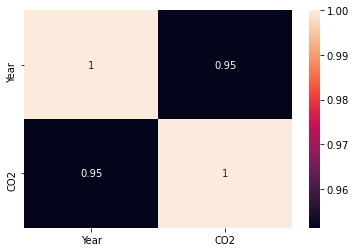

In [29]:
# heatmap 
sns.heatmap(corelation,annot=True)

<AxesSubplot:>

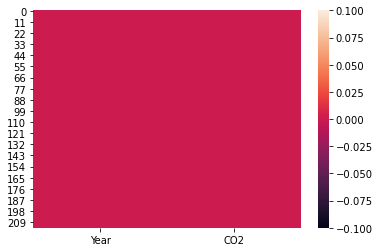

In [30]:
sns.heatmap(data.isnull())

<AxesSubplot:>

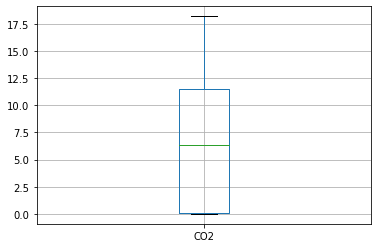

In [31]:
# boxplot :
data.boxplot(column="CO2")

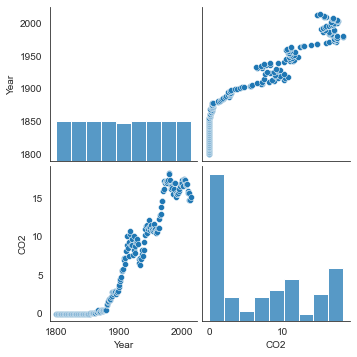

In [32]:
# Create the default pairplot
sns.set_style(style='white')
sns.pairplot(data)

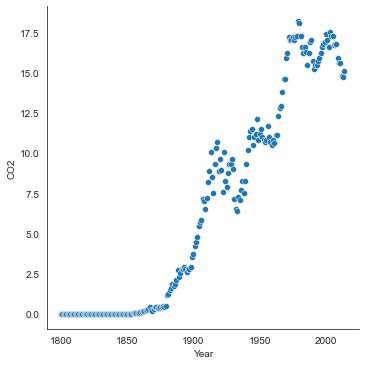

In [33]:
sns.relplot(x='Year',y='CO2',data=data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

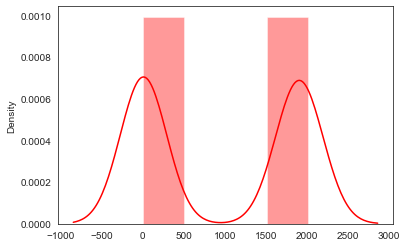

In [34]:
# density plot
ax=plt.axes()
ax.set_facecolor("white")
sns.distplot(data,color='red')

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

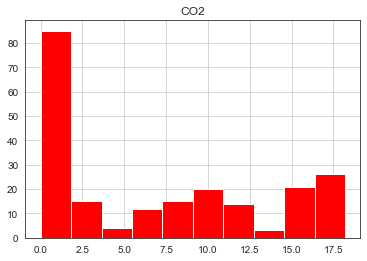

In [35]:
# histogram 
data.hist(['CO2'],color='red')

Inference: The value count for Co2 emission from 0.0 to 2 is the highest which is approximately before 1879

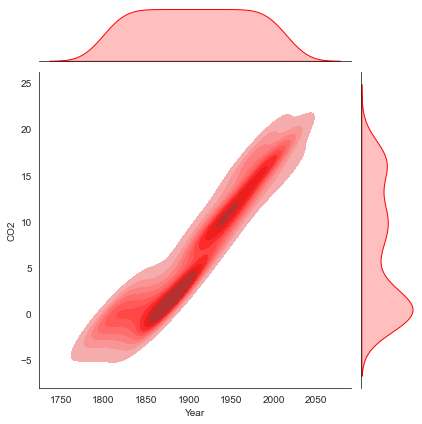

In [36]:
# joint plot
sns.jointplot(x='Year',y='CO2',data=data,kind='kde',color='red',fill=True)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='CO2'>

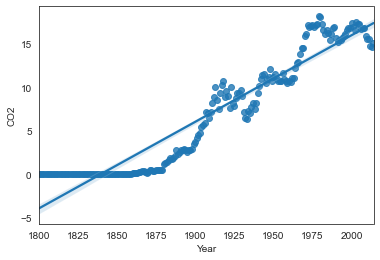

In [37]:
sns.regplot(data['Year'],data['CO2'])

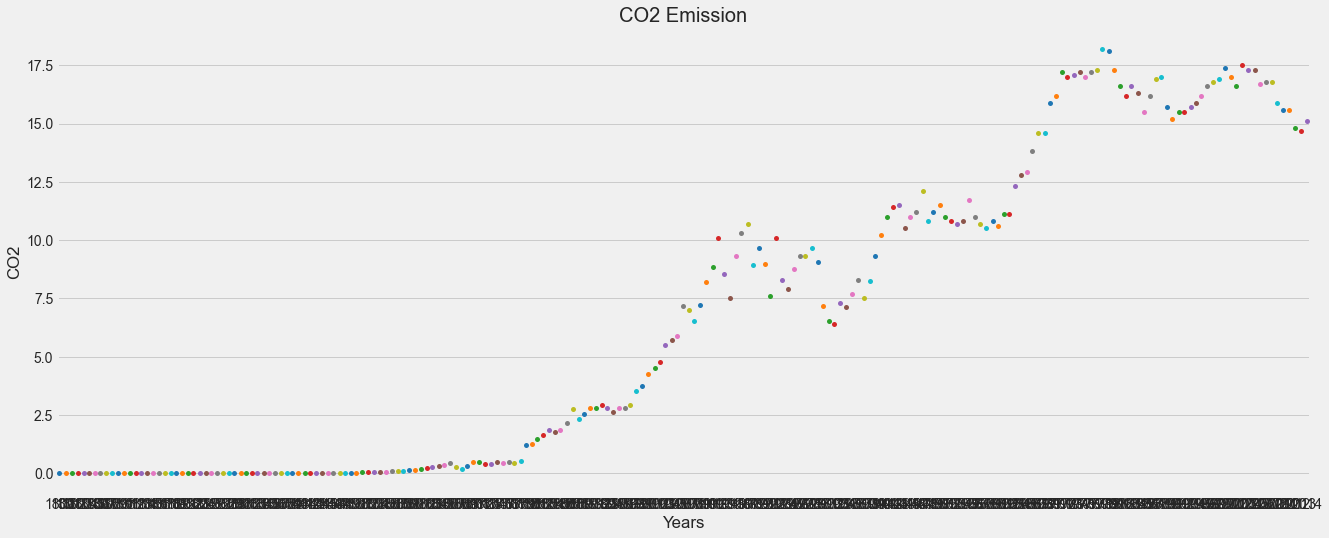

In [39]:
# scatter plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,8)

sns.stripplot(x=data['Year'],y=data['CO2'], palette = 'tab10')

plt.xlabel('Years')
plt.ylabel('CO2')
plt.title("CO2 Emission",fontsize=20)
plt.show()

In [40]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Year', y_column = 'CO2', 
    bubble_column = 'CO2', time_column = 'Year', size_column = 'Year', color_column = 'CO2', 
    x_title = "Year", y_title = "CO2", title = 'Year vs CO2',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [41]:
VisualAnalysis(data)

In [42]:
data=pd.read_excel('CO2 dataset.xlsx',index_col='Year',parse_dates=True)
data.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

## Transformations

In [43]:
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    
    plt.show()

**Scaling Transform**

Mean: 6.741970186046512
Standard Deviation: 6.522436853526819


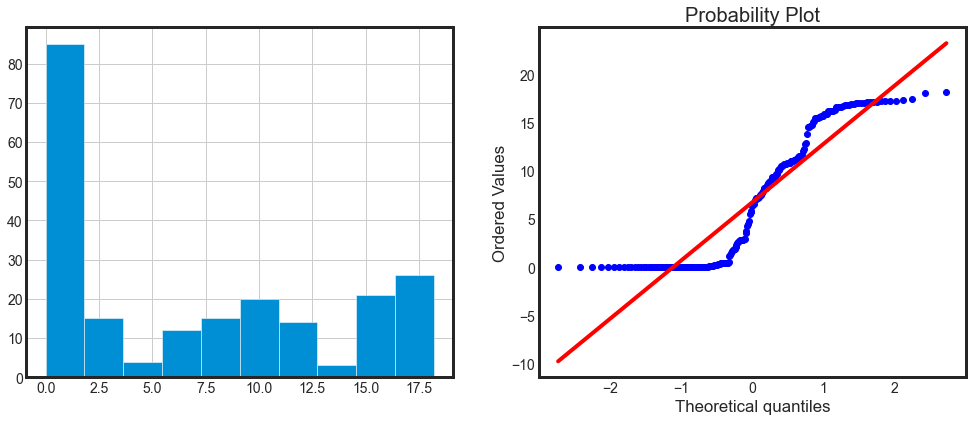

In [46]:
data = data[['CO2']]

print('Mean:', data['CO2'].mean())
print('Standard Deviation:', data['CO2'].std())

diagnostic_plots(data,'CO2')

**Standard Scaling Transform**

Mean: 2.003565272346794e-16
Standard Deviation: 1.0023337254608682


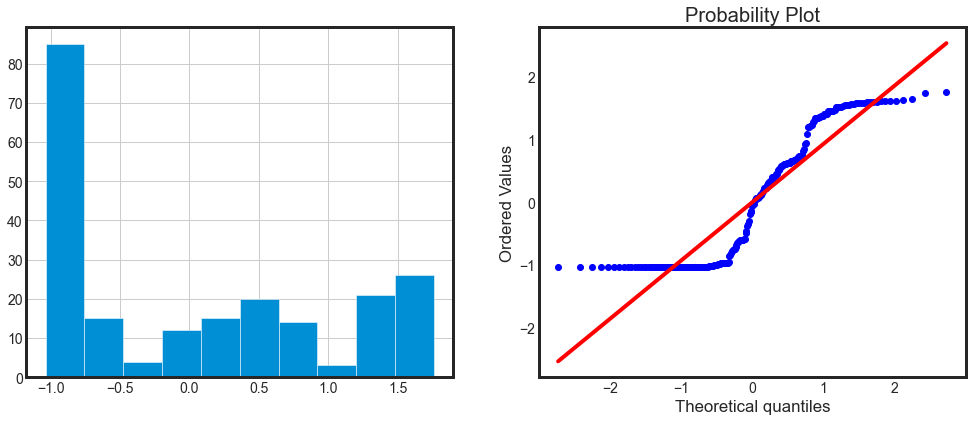

In [47]:
standard_scaler = StandardScaler()
data['CO2_scaled'] = standard_scaler.fit_transform(data[['CO2']])

print('Mean:', data['CO2_scaled'].mean())
print('Standard Deviation:', data['CO2_scaled'].std())

diagnostic_plots(data,'CO2_scaled')

**Min-Max Scaling (Normalization) Transform**

Mean: 0.37037738167387046
Standard Deviation: 0.3584101138036251


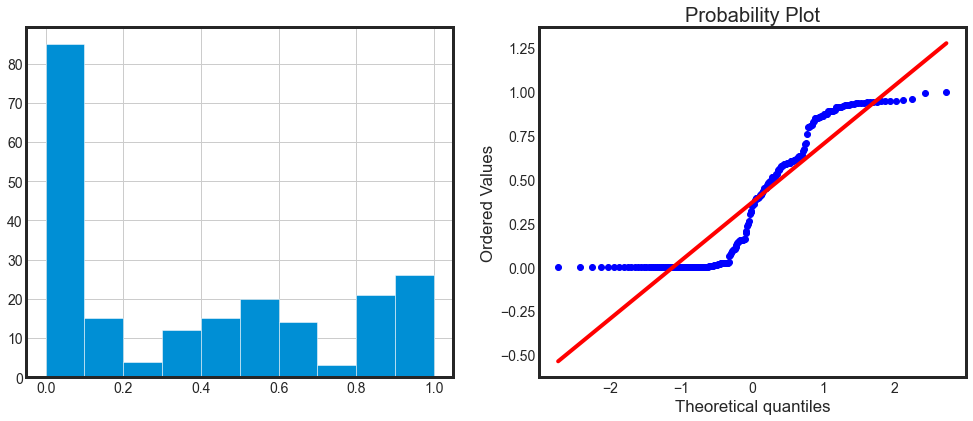

In [48]:
minmax_scaler = MinMaxScaler()
data['CO2_min_max_scaled'] = minmax_scaler.fit_transform(data[['CO2']])

print('Mean:', data['CO2_min_max_scaled'].mean())
print('Standard Deviation:', data['CO2_min_max_scaled'].std())

diagnostic_plots(data,'CO2_min_max_scaled')

**Quantile Transformation** 

Mean: 0.5004129537057166
Standard Deviation: 0.2910472261998255


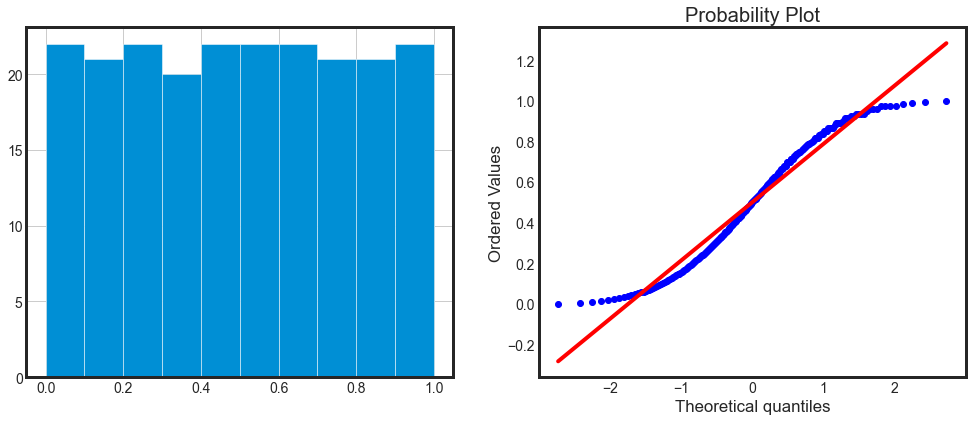

In [49]:
qtrans = QuantileTransformer()
data['CO2_q_trans_uniform'] = qtrans.fit_transform(data[['CO2']])

print('Mean:', data['CO2_q_trans_uniform'].mean())
print('Standard Deviation:', data['CO2_q_trans_uniform'].std())

diagnostic_plots(data,'CO2_q_trans_uniform')

Mean: 0.0018711935620056976
Standard Deviation: 1.0997777273515295


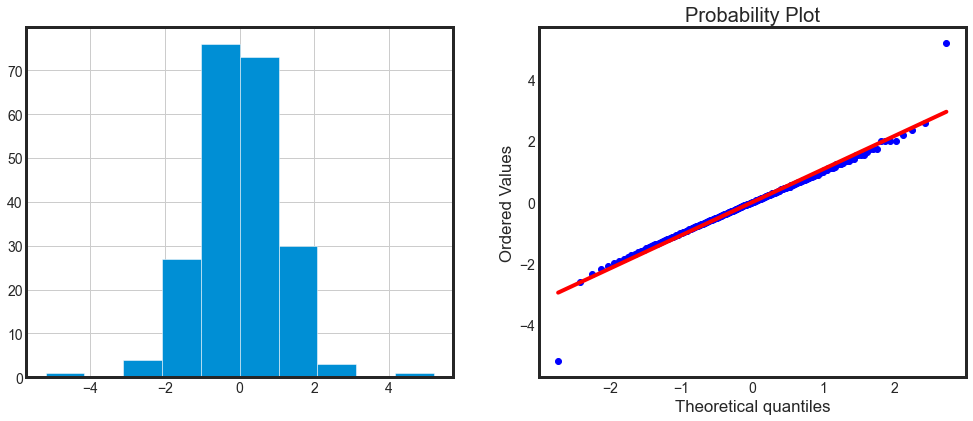

In [50]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
data['CO2_q_trans_normal'] = qtrans.fit_transform(data[['CO2']])

print('Mean:', data['CO2_q_trans_normal'].mean())
print('Standard Deviation:', data['CO2_q_trans_normal'].std())

diagnostic_plots(data,'CO2_q_trans_normal')

In [51]:
data

CO2  CO2_scaled  CO2_min_max_scaled  CO2_q_trans_uniform  \
Year                                                                        
1800-01-01   0.00568   -1.035198            0.000216             0.210280   
1801-01-01   0.00561   -1.035208            0.000212             0.205607   
1802-01-01   0.00555   -1.035218            0.000209             0.200935   
1803-01-01   0.00548   -1.035228            0.000205             0.196262   
1804-01-01   0.00542   -1.035238            0.000202             0.191589   
...              ...         ...                 ...                  ...   
2010-01-01  15.60000    1.361255            0.857129             0.831776   
2011-01-01  15.60000    1.361255            0.857129             0.831776   
2012-01-01  14.80000    1.238316            0.813169             0.799065   
2013-01-01  14.70000    1.222948            0.807674             0.794393   
2014-01-01  15.10000    1.284418            0.829654             0.803738   

            CO2_q_trans_normal  
Year                            
1800-01-01           -0.805449  
1801-01-01           -0.821757  
1802-01-01           -0.838288  
1803-01-01           -0.855050  
1804-01-01           -0.872056  
...                        ...  
2010-01-01            0.961206  
2011-01-01            0.961206  
2012-01-01            0.838288  
2013-01-01            0.821757  
2014-01-01            0.855050  

[215 rows x 5 columns]

In [52]:
data.dtypes

CO2                    float64
CO2_scaled             float64
CO2_min_max_scaled     float64
CO2_q_trans_uniform    float64
CO2_q_trans_normal     float64
dtype: object

In [53]:
data.describe()

CO2    CO2_scaled  CO2_min_max_scaled  CO2_q_trans_uniform  \
count  215.000000  2.150000e+02          215.000000           215.000000   
mean     6.741970  2.003565e-16            0.370377             0.500413   
std      6.522437  1.002334e+00            0.358410             0.291047   
min      0.001750 -1.035802e+00            0.000000             0.000000   
25%      0.041050 -1.029762e+00            0.002160             0.250000   
50%      6.390000 -5.408892e-02            0.351037             0.500000   
75%     11.500000  7.311889e-01            0.631833             0.750000   
max     18.200000  1.760810e+00            1.000000             1.000000   

       CO2_q_trans_normal  
count        2.150000e+02  
mean         1.871194e-03  
std          1.099778e+00  
min         -5.199338e+00  
25%         -6.745080e-01  
50%          5.565833e-16  
75%          6.744898e-01  
max          5.199338e+00

array([[<AxesSubplot:title={'center':'CO2'}>,
        <AxesSubplot:title={'center':'CO2_scaled'}>],
       [<AxesSubplot:title={'center':'CO2_min_max_scaled'}>,
        <AxesSubplot:title={'center':'CO2_q_trans_uniform'}>],
       [<AxesSubplot:title={'center':'CO2_q_trans_normal'}>,
        <AxesSubplot:>]], dtype=object)

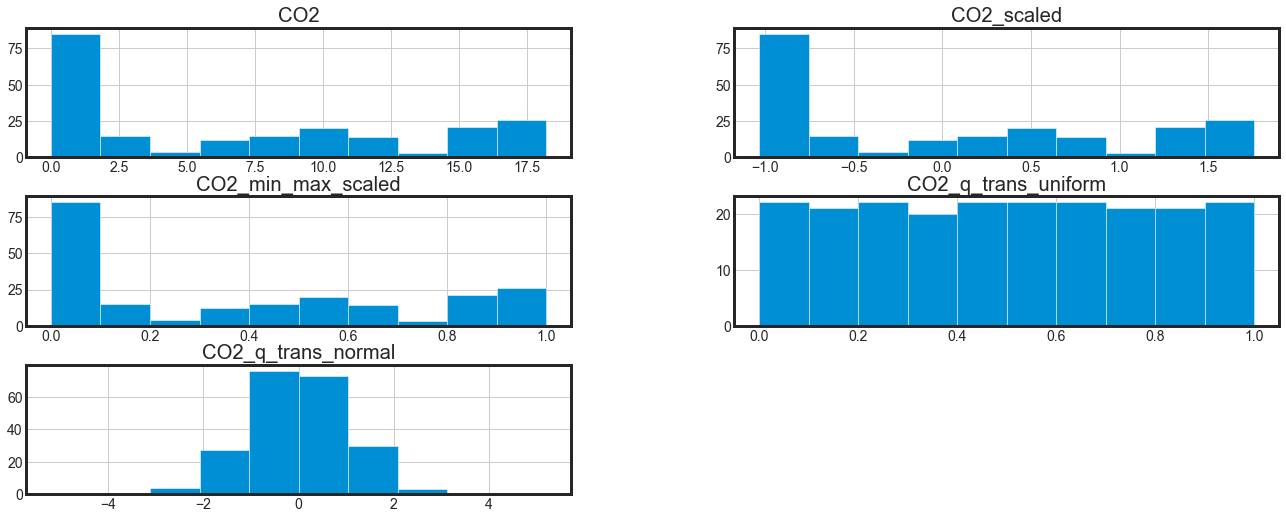

In [54]:
data.hist()

since we didnot get any conclusive evidence of being normal distribution
We have decided to move on without transforming it to normal distribution.

<AxesSubplot:xlabel='Year'>

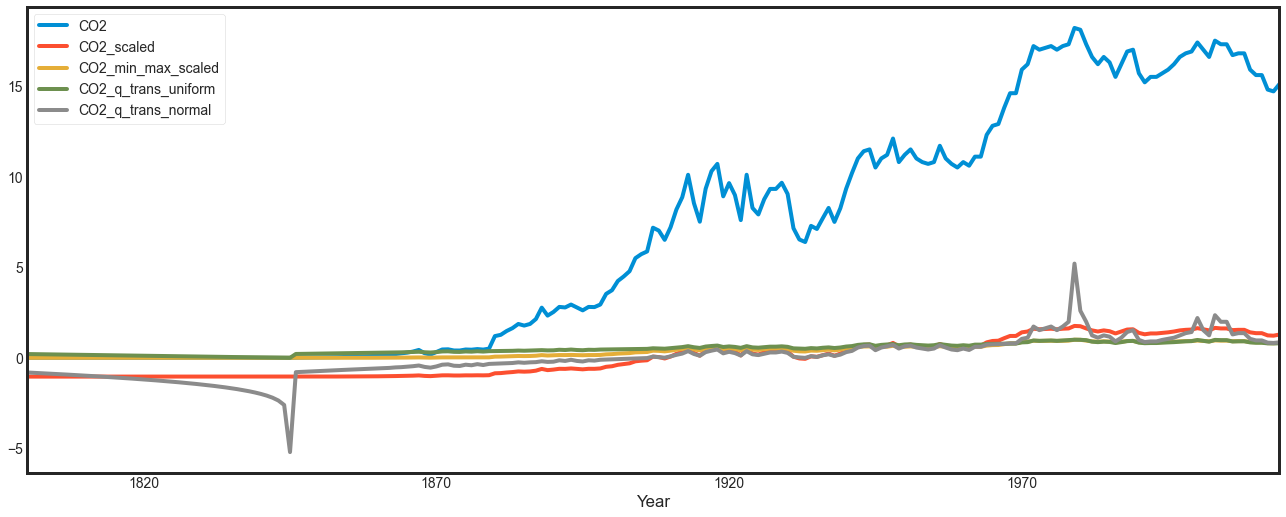

In [55]:
data.plot()

In [56]:
# dropping all transformed values from dataset
data=data.drop(['CO2_scaled','CO2_min_max_scaled','CO2_q_trans_uniform','CO2_q_trans_normal'],axis=1)
data.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

In [57]:
data.describe()

CO2
count  215.000000
mean     6.741970
std      6.522437
min      0.001750
25%      0.041050
50%      6.390000
75%     11.500000
max     18.200000

<AxesSubplot:xlabel='Year'>

<Figure size 1440x504 with 0 Axes>

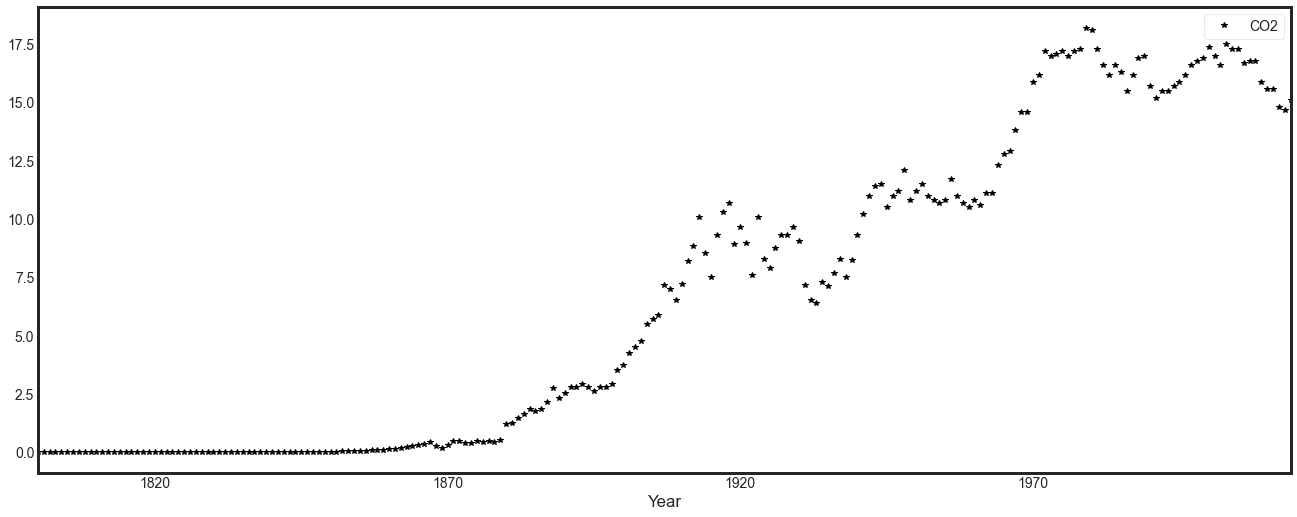

In [58]:
plt.figure(figsize=(20,7))
data.plot(style = '*',color="black")

# Model Building on Stationary Data

**Test Stationary**

In [59]:
X = data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.888644, mean2=12.650000
variance1=2.399437, variance2=13.176064


Since mean and variance changes drastically it is evident that out data is not stationary.
let's confirm it using ADFuller test.

**Testing Stationary using ADFuller test**

In [60]:
# Test for Stationarity (Dickey Fuller Test) :
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary

def TestStationaryAdfuller(data, cutoff = 0.01):
    data_test = adfuller(data, autolag = 'AIC')
    data_test_output = pd.Series(data_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in data_test[4].items():
        data_test_output['Critical Value (%s)'%key] = value
    print(data_test_output)
    
    if data_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [61]:
#Define Stationary Plot

def TestStationaryPlot(data):
    rol_mean = data.rolling(window = 20, center = False).mean()
    rol_std = data.rolling(window = 20, center = False).std()
    
    plt.plot(data, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

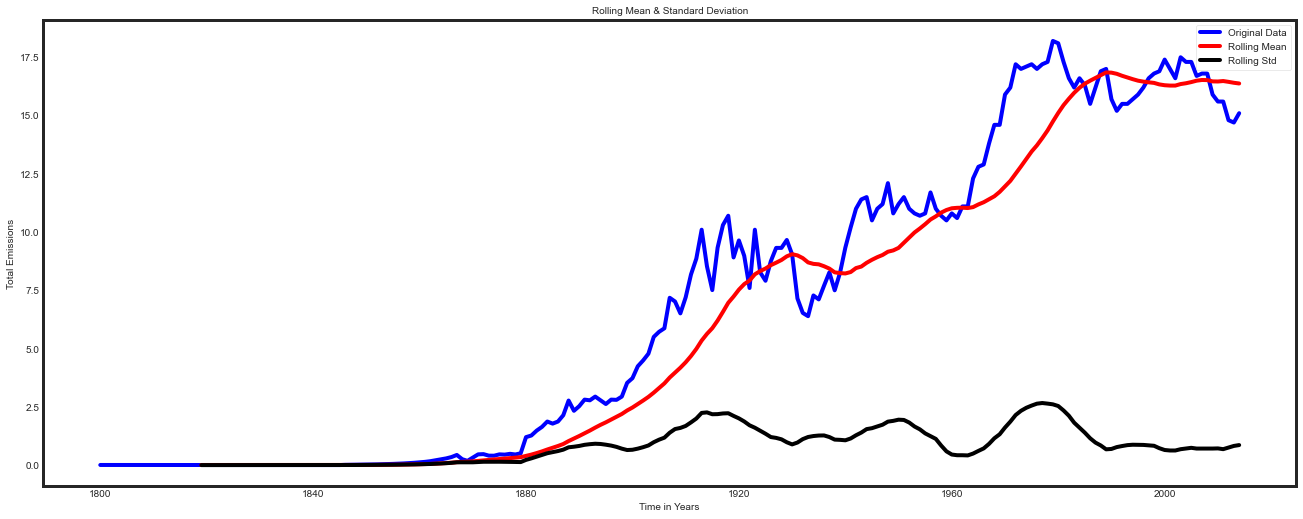

In [62]:
# stationary plot for data
TestStationaryPlot(data)

In [63]:
# test for stationarity dataframe data
TestStationaryAdfuller(data.dropna(inplace=False))

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


the emissions mean and the variation in standard deviation (black line) clearly vary with time.
this shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels.
Hence, no evidence to accept the null hypothesis.
Therefore the series is non stationary.

## Transforming data to Stationary
**Transforming data to stationary using three following methods:**
1) Moving Average
2) Differencing
3) Decomposing

**1) Moving Average**

In [64]:
# moving average of data first 6 order 
moving_avg = data.rolling(6).mean()
moving_avg_diff = data - moving_avg
moving_avg_diff.head(10)

CO2
Year                
1800-01-01       NaN
1801-01-01       NaN
1802-01-01       NaN
1803-01-01       NaN
1804-01-01       NaN
1805-01-01 -0.000157
1806-01-01 -0.000162
1807-01-01 -0.000158
1808-01-01 -0.000155
1809-01-01 -0.000153

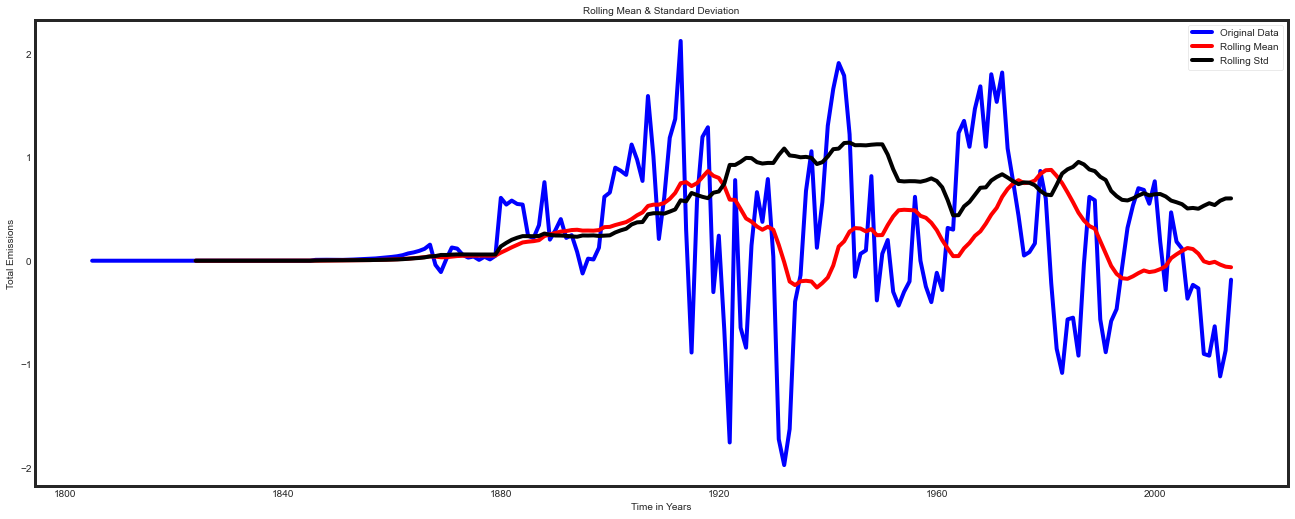

In [65]:
# stationary plot for data first 6 order 
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [66]:
# test for stationarity dataframe data first 6 order 
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                -6.015442e+00
p-value                        1.537668e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


**2) Eliminating trend and sessonality: Differencing**

In [67]:
# first order differencing data
data_first_difference = data - data.shift(1)
data_first_difference.head()

CO2
Year               
1800-01-01      NaN
1801-01-01 -0.00007
1802-01-01 -0.00006
1803-01-01 -0.00007
1804-01-01 -0.00006

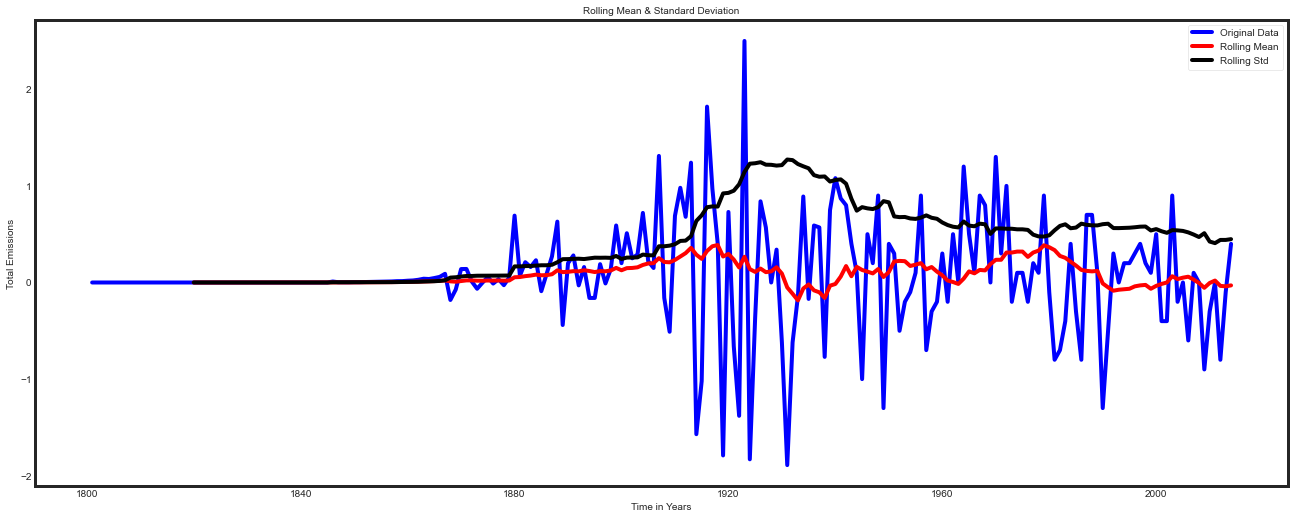

In [68]:
# stationary plot for data first
TestStationaryPlot(data_first_difference)

In [69]:
# stationary plot for data first
TestStationaryAdfuller(data_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


the first difference improves the stationarity of the series significantly. 
let us use the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data.

In [70]:
# seasonal first order differencing
data_seasonal_first_difference=data_first_difference - data_first_difference.shift(1)  
data_seasonal_first_difference.head()


CO2
Year               
1800-01-01      NaN
1801-01-01      NaN
1802-01-01  0.00001
1803-01-01 -0.00001
1804-01-01  0.00001

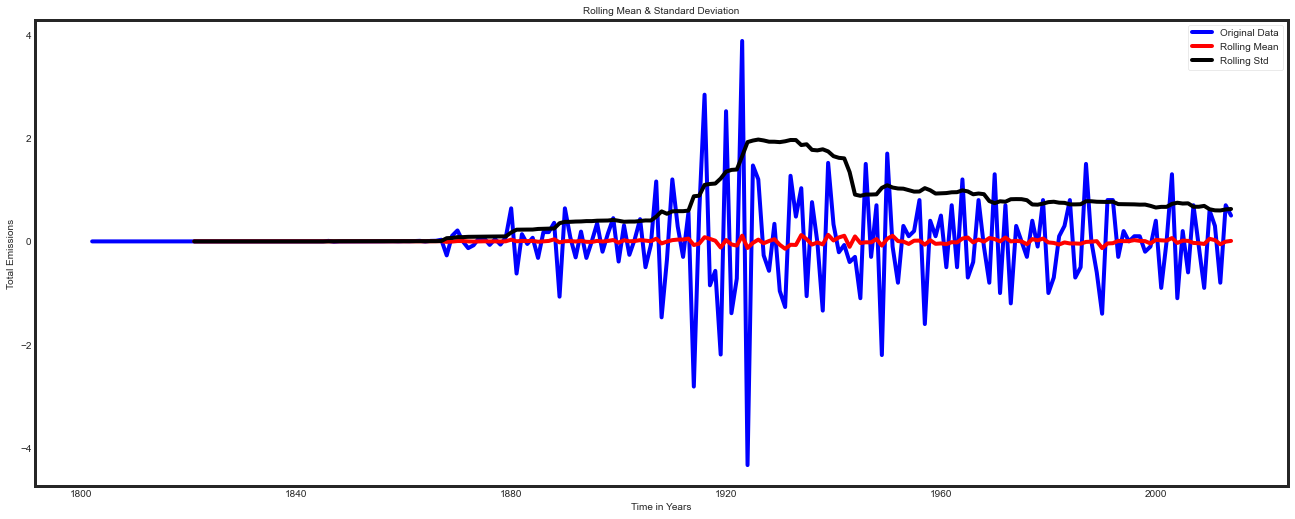

In [71]:
# stationary Plot for seasonal_first_difference
TestStationaryPlot(data_seasonal_first_difference.dropna(inplace=False))

In [72]:
# again test dickey fuller test on data_seasonal_first_difference
TestStationaryAdfuller(data_seasonal_first_difference.dropna(inplace=False))

Test Statistic                  -5.536081
p-value                          0.000002
#Lags Used                      14.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


We are considering this seasonal first difference for further analysis because it looks more stationary

**Time Series Decomposition Plot**

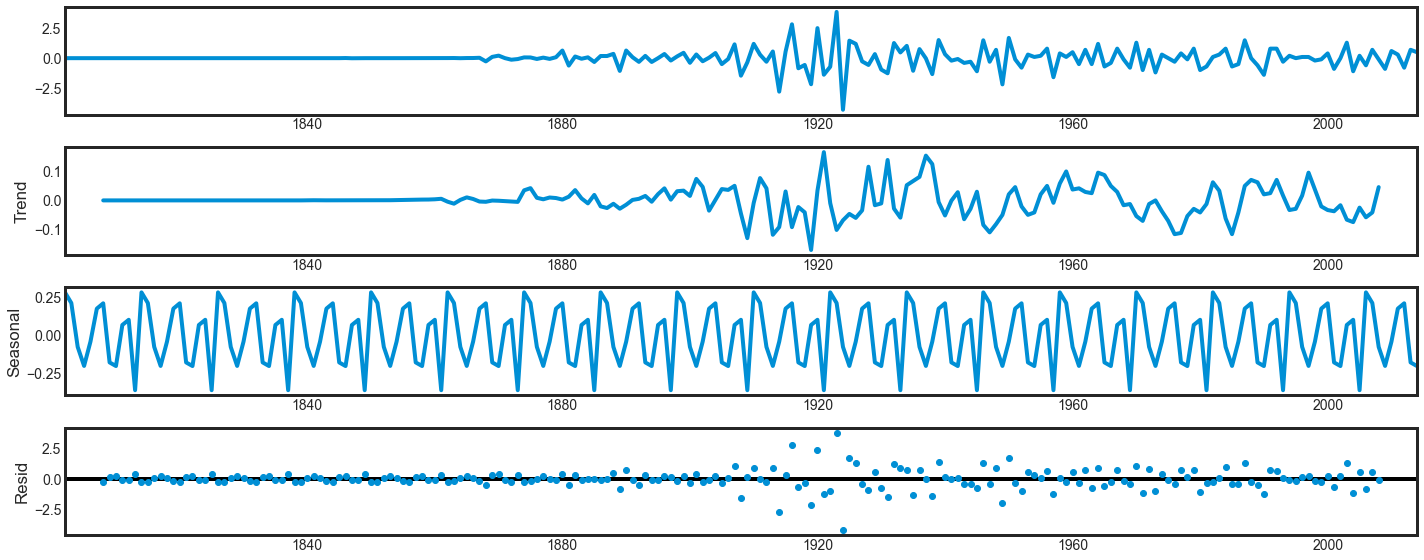

In [73]:
#Time Series Decomposition Plot for data_seasonal_first_difference
decomposition = seasonal_decompose(data_seasonal_first_difference.dropna(),period=12)
decomposition.plot()
plt.show()

here we can see that the trend, no seasonaltiy in data and we can model the trend. here original data and trend both are equal.

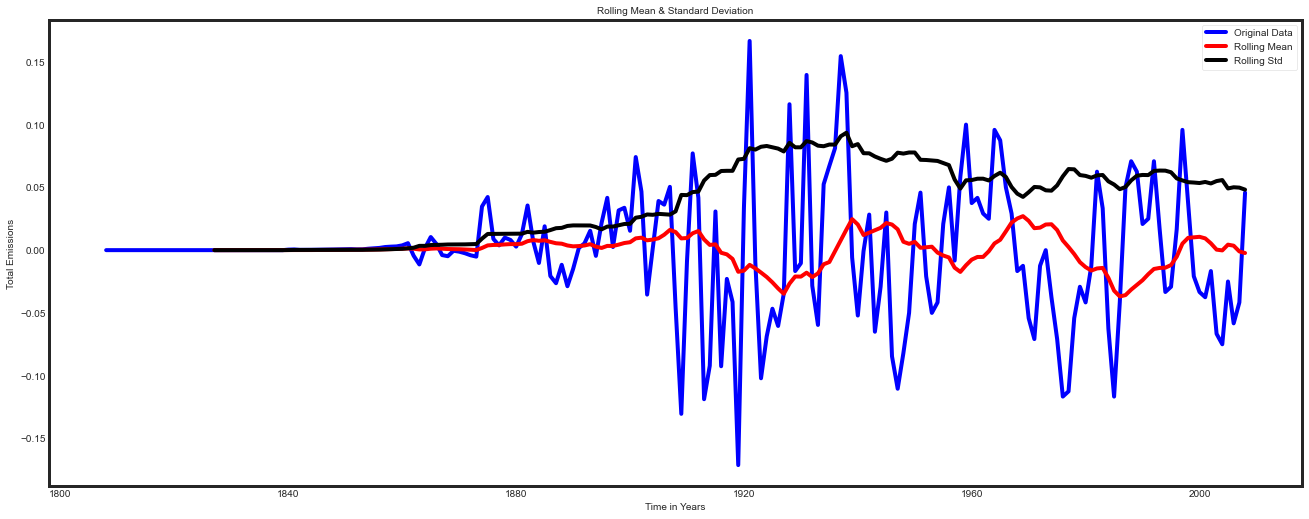

Test Statistic                  -5.628393
p-value                          0.000001
#Lags Used                      14.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
Failed to reject null hypothesis. Data is stationary


In [74]:
# stationary Plot for data_seasonal_first_difference
trend = decomposition.trend

decompose = trend
decompose.dropna(inplace=True)
TestStationaryPlot(decompose)
TestStationaryAdfuller(decompose)

**ACF (Autocorrelation Function) Plot & PACF (Partial Autocorrelation Function) Plot for seasonal first order difference**

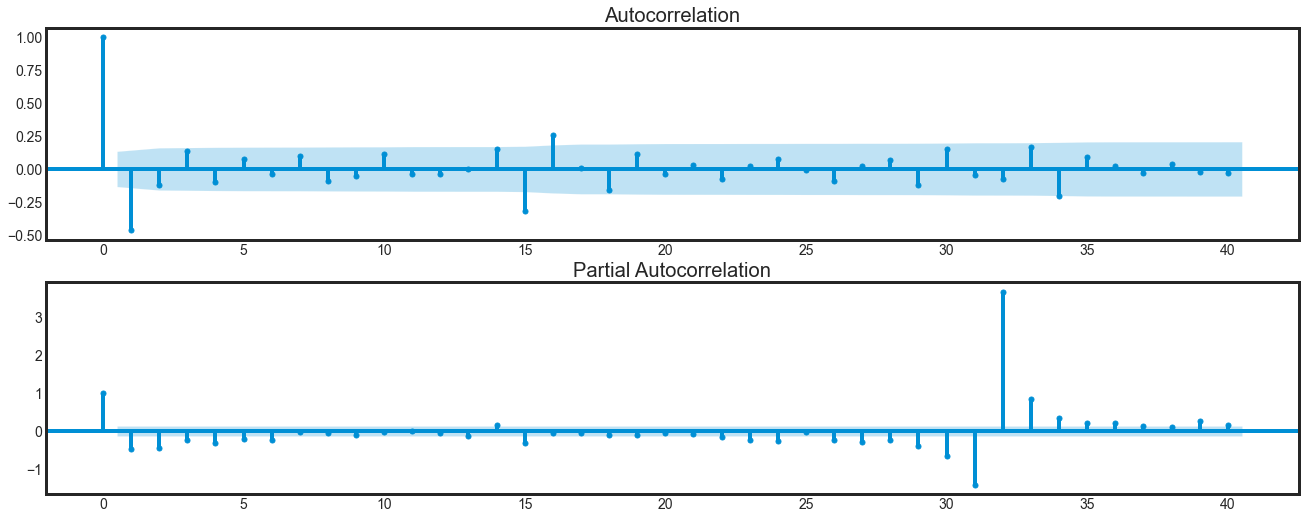

In [75]:
# ACF and PACF plots:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

We will find optimal parameters (p,d,q) using grid search later.

**Data Partitioning**

Training Data = Fit the model only to training period.
Validating Data = Assess the model performance on validation.
Deploy model by training on whole dataset.
No random partition That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [76]:
# using seasonal first order difference
data_seasonal_first_difference

X = data_seasonal_first_difference.dropna(inplace=False)
X

CO2
Year                    
1802-01-01  1.000000e-05
1803-01-01 -1.000000e-05
1804-01-01  1.000000e-05
1805-01-01 -8.673617e-19
1806-01-01 -1.000000e-05
...                  ...
2010-01-01  6.000000e-01
2011-01-01  3.000000e-01
2012-01-01 -8.000000e-01
2013-01-01  7.000000e-01
2014-01-01  5.000000e-01

[213 rows x 1 columns]

In [77]:
# create Training and Test
train = X.iloc[:-20]
test = X.iloc[-20:]

print(train.shape,test.shape)

(193, 1) (20, 1)


In [78]:
train

CO2
Year                    
1802-01-01  1.000000e-05
1803-01-01 -1.000000e-05
1804-01-01  1.000000e-05
1805-01-01 -8.673617e-19
1806-01-01 -1.000000e-05
...                  ...
1990-01-01 -1.400000e+00
1991-01-01  8.000000e-01
1992-01-01  8.000000e-01
1993-01-01 -3.000000e-01
1994-01-01  2.000000e-01

[193 rows x 1 columns]

In [79]:
test

CO2
Year                    
1995-01-01  1.776357e-15
1996-01-01  1.000000e-01
1997-01-01  1.000000e-01
1998-01-01 -2.000000e-01
1999-01-01 -1.000000e-01
2000-01-01  4.000000e-01
2001-01-01 -9.000000e-01
2002-01-01  0.000000e+00
2003-01-01  1.300000e+00
2004-01-01 -1.100000e+00
2005-01-01  2.000000e-01
2006-01-01 -6.000000e-01
2007-01-01  7.000000e-01
2008-01-01 -1.000000e-01
2009-01-01 -9.000000e-01
2010-01-01  6.000000e-01
2011-01-01  3.000000e-01
2012-01-01 -8.000000e-01
2013-01-01  7.000000e-01
2014-01-01  5.000000e-01

**Hyper-parameter Tuning : Finding out optimal (p,d,q)**

In [80]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [81]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [82]:
# evaluate parameters
p_values = [0, 1, 2, 3, 4]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.613
ARIMA(0, 0, 1) RMSE=0.467
ARIMA(0, 0, 2) RMSE=0.471
ARIMA(0, 1, 0) RMSE=1.037
ARIMA(0, 1, 1) RMSE=0.613
ARIMA(0, 1, 2) RMSE=0.450
ARIMA(0, 2, 0) RMSE=1.853
ARIMA(0, 2, 1) RMSE=1.039
ARIMA(0, 2, 2) RMSE=0.679
ARIMA(1, 0, 0) RMSE=0.546
ARIMA(1, 0, 1) RMSE=0.470
ARIMA(1, 0, 2) RMSE=0.464
ARIMA(1, 1, 0) RMSE=0.838
ARIMA(1, 1, 1) RMSE=0.546
ARIMA(1, 1, 2) RMSE=0.452
ARIMA(1, 2, 0) RMSE=1.374
ARIMA(1, 2, 1) RMSE=0.840
ARIMA(1, 2, 2) RMSE=0.613
ARIMA(2, 0, 0) RMSE=0.443
ARIMA(2, 0, 1) RMSE=0.476
ARIMA(2, 0, 2) RMSE=0.462
ARIMA(2, 1, 0) RMSE=0.634
ARIMA(2, 1, 1) RMSE=0.443
ARIMA(2, 1, 2) RMSE=0.455
ARIMA(2, 2, 0) RMSE=0.999
ARIMA(2, 2, 1) RMSE=0.636
ARIMA(2, 2, 2) RMSE=0.446
ARIMA(3, 0, 0) RMSE=0.433
ARIMA(3, 0, 1) RMSE=0.464
ARIMA(3, 0, 2) RMSE=0.466
ARIMA(3, 1, 0) RMSE=0.573
ARIMA(3, 1, 1) RMSE=0.434
ARIMA(3, 1, 2) RMSE=0.445
ARIMA(3, 2, 0) RMSE=0.863
ARIMA(3, 2, 1) RMSE=0.575
ARIMA(3, 2, 2) RMSE=0.444
ARIMA(4, 0, 0) RMSE=0.457
ARIMA(4, 0, 1) RMSE=0.466
ARIMA(4, 0, 

***1)ARIMA Model***

In [83]:
model_arima = ARIMA(train['CO2'],order = (3,2,2))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  193
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -194.543
Date:                Sat, 12 Feb 2022   AIC                            401.086
Time:                        13:03:58   BIC                            420.599
Sample:                    01-01-1802   HQIC                           408.990
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7695      0.052    -14.923      0.000      -0.871      -0.668
ar.L2         -0.5610      0.069     -8.112      0.000      -0.697      -0.425
ar.L3         -0.2373      0.050     -4.722      0.000      -0.336      -0.139
ma.L1         -1.9645      0.055    -35.652      0.000      -2.072      -1.856
ma.L2          0.9699      0.058     16.781      0.000       0.857       1.083
sigma2         0.4098      0.032     12.710      0.000       0.347       0.473
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               281.86
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):           14528.90   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
# make prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01   -0.220928
1996-01-01    0.082307
1997-01-01   -0.034667
1998-01-01   -0.016053
1999-01-01   -0.037846
2000-01-01   -0.004915
2001-01-01   -0.023595
2002-01-01   -0.023673
2003-01-01   -0.022095
2004-01-01   -0.019982
2005-01-01   -0.023624
2006-01-01   -0.023530
2007-01-01   -0.023209
2008-01-01   -0.023794
2009-01-01   -0.024695
2010-01-01   -0.024899
2011-01-01   -0.025246
2012-01-01   -0.025799
2013-01-01   -0.026279
2014-01-01   -0.026666
Freq: AS-JAN, Name: predicted_mean, dtype: float64


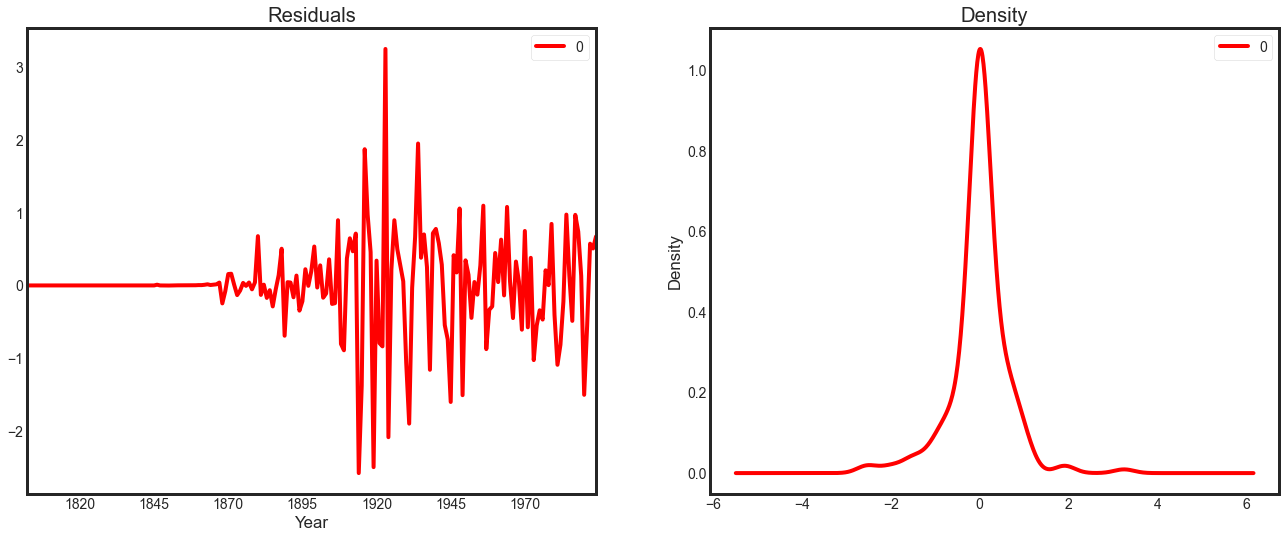

In [85]:
# plot residual errors
residuals = pd.DataFrame(model_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals",color='red', ax=ax[0])
residuals.plot(kind='kde', title='Density',color='red', ax=ax[1])
plt.show()

In [86]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [87]:
stationary_arima_acc = forecast_accuracy(pred_arima.values, test.values)
stationary_arima_acc

{'mape': inf,
 'me': -0.03845941084694279,
 'mae': 0.48782887322892227,
 'mpe': nan,
 'rmse': 0.6147373012505387}

***2)Auto Regressor (AR) Model***

In [88]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  193
Model:                     AutoReg(6)   Log Likelihood                -160.352
Method:               Conditional MLE   S.D. of innovations              0.570
Date:                Sat, 12 Feb 2022   AIC                             -1.037
Time:                        13:04:07   BIC                             -0.899
Sample:                    01-01-1808   HQIC                            -0.981
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0034      0.042     -0.081      0.935      -0.085       0.078
CO2.L1        -0.9695      0.071    -13.652      0.000      -1.109      -0.830
CO2.L2        -1.0067      0.095    -10.572      0.0

In [89]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1995-01-01   -0.355927
1996-01-01   -0.208764
1997-01-01    0.053936
1998-01-01    0.239338
1999-01-01    0.124217
2000-01-01   -0.146736
2001-01-01   -0.040342
2002-01-01   -0.065187
2003-01-01    0.009840
2004-01-01    0.077525
2005-01-01    0.029742
2006-01-01   -0.016715
2007-01-01   -0.048704
2008-01-01   -0.008430
2009-01-01    0.008656
2010-01-01    0.016361
2011-01-01    0.014504
2012-01-01   -0.008896
2013-01-01   -0.013300
2014-01-01   -0.007153
Freq: AS-JAN, dtype: float64


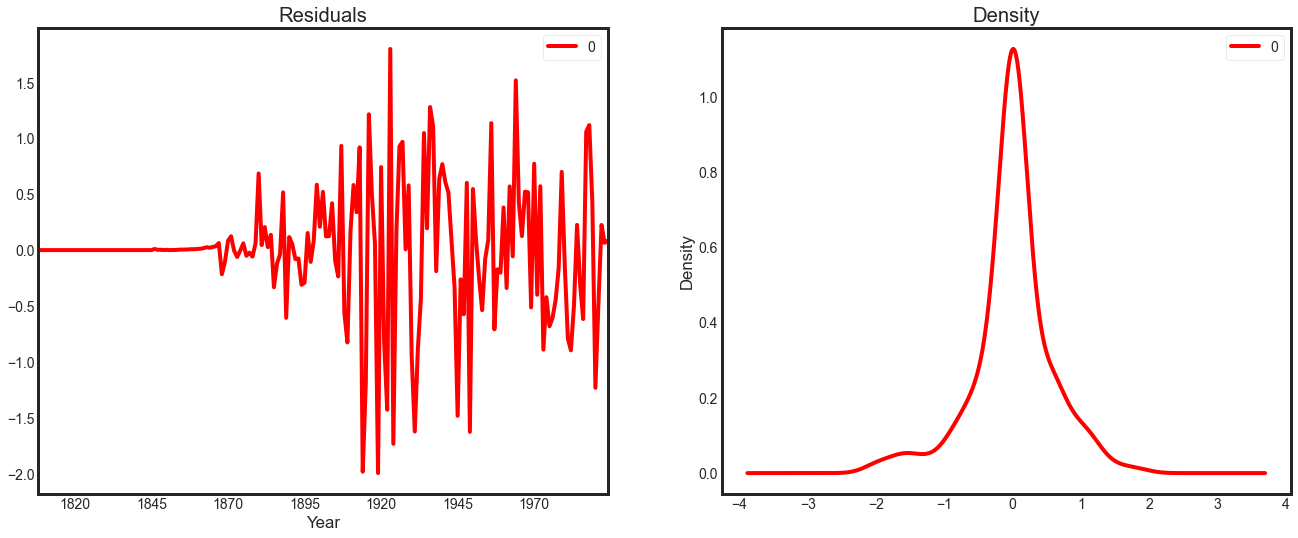

In [90]:
# plot residual errors
residuals = pd.DataFrame(model_ar.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals",color='red', ax=ax[0])
residuals.plot(kind='kde', title='Density',color='red', ax=ax[1])
plt.show()

In [91]:
stationary_ar_acc = forecast_accuracy(pred_ar.values, test.values)
stationary_ar_acc

{'mape': inf,
 'me': -0.02730173594954122,
 'mae': 0.4959715255851231,
 'mpe': nan,
 'rmse': 0.6233294379710825}

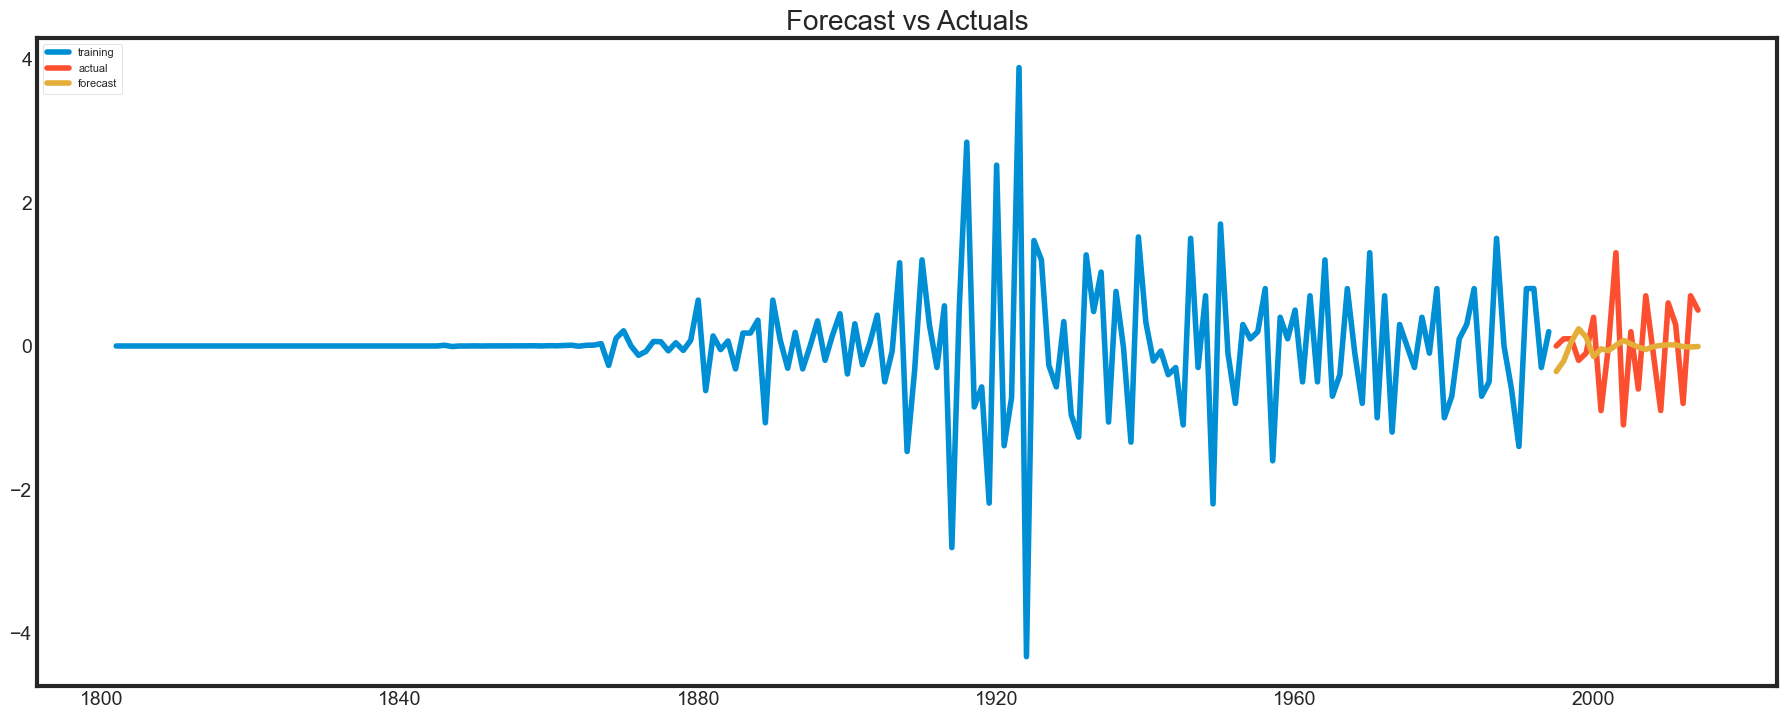

In [92]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


***3)Moving Average (MA) Model***

In [93]:
# only use q or MA parameter
model_ma = ARIMA(train['CO2'],order = (0,1,3))
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  193
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -169.366
Date:                Sat, 12 Feb 2022   AIC                            346.732
Time:                        13:04:14   BIC                            359.762
Sample:                    01-01-1802   HQIC                           352.009
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.0351      0.875     -2.326      0.020      -3.750      -0.320
ma.L2          1.0722      0.900      1.191      0.233      -0.692       2.836
ma.L3         -0.0364      0.047     -0.770      0.441      -0.129       0.056
sigma2         0.3141      0.276      1.140      0.254      -0.226       0.854
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               130.50
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):            4547.59   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

1995-01-01   -0.066664
1996-01-01   -0.000622
1997-01-01   -0.002694
1998-01-01   -0.002694
1999-01-01   -0.002694
2000-01-01   -0.002694
2001-01-01   -0.002694
2002-01-01   -0.002694
2003-01-01   -0.002694
2004-01-01   -0.002694
2005-01-01   -0.002694
2006-01-01   -0.002694
2007-01-01   -0.002694
2008-01-01   -0.002694
2009-01-01   -0.002694
2010-01-01   -0.002694
2011-01-01   -0.002694
2012-01-01   -0.002694
2013-01-01   -0.002694
2014-01-01   -0.002694
Freq: AS-JAN, Name: predicted_mean, dtype: float64


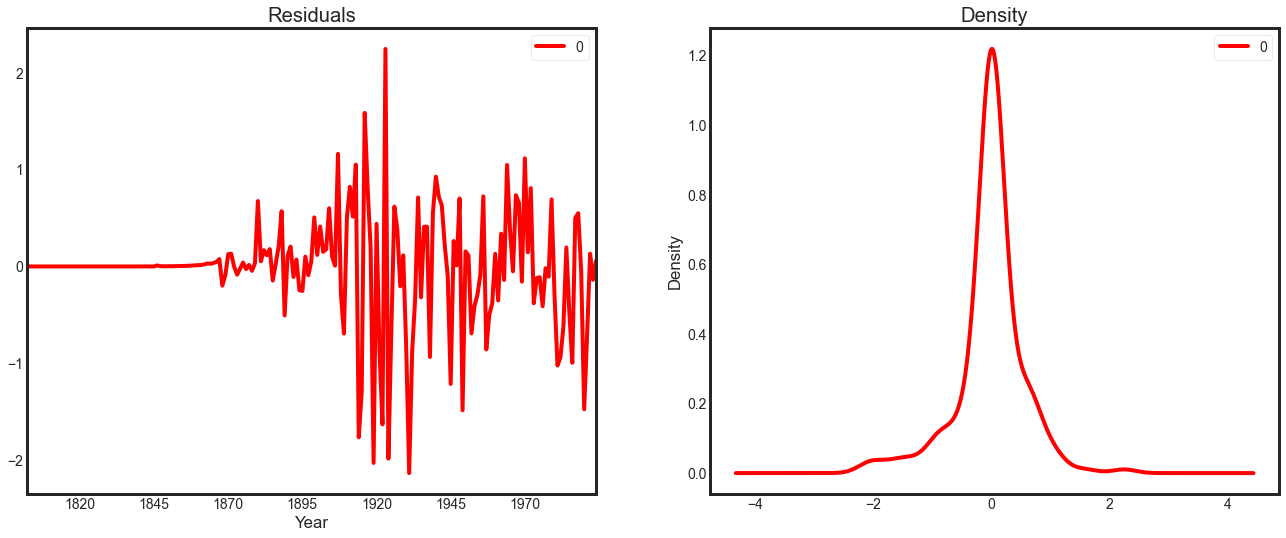

In [95]:
# plot residual errors
residuals = pd.DataFrame(model_ma.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals",color='red', ax=ax[0])
residuals.plot(kind='kde', title='Density',color='red', ax=ax[1])
plt.show()

In [96]:
stationary_ma_acc = forecast_accuracy(pred_ma.values, test.values)
stationary_ma_acc

{'mape': inf,
 'me': -0.01578898744579512,
 'mae': 0.4811577974891593,
 'mpe': -inf,
 'rmse': 0.6118370160324333}

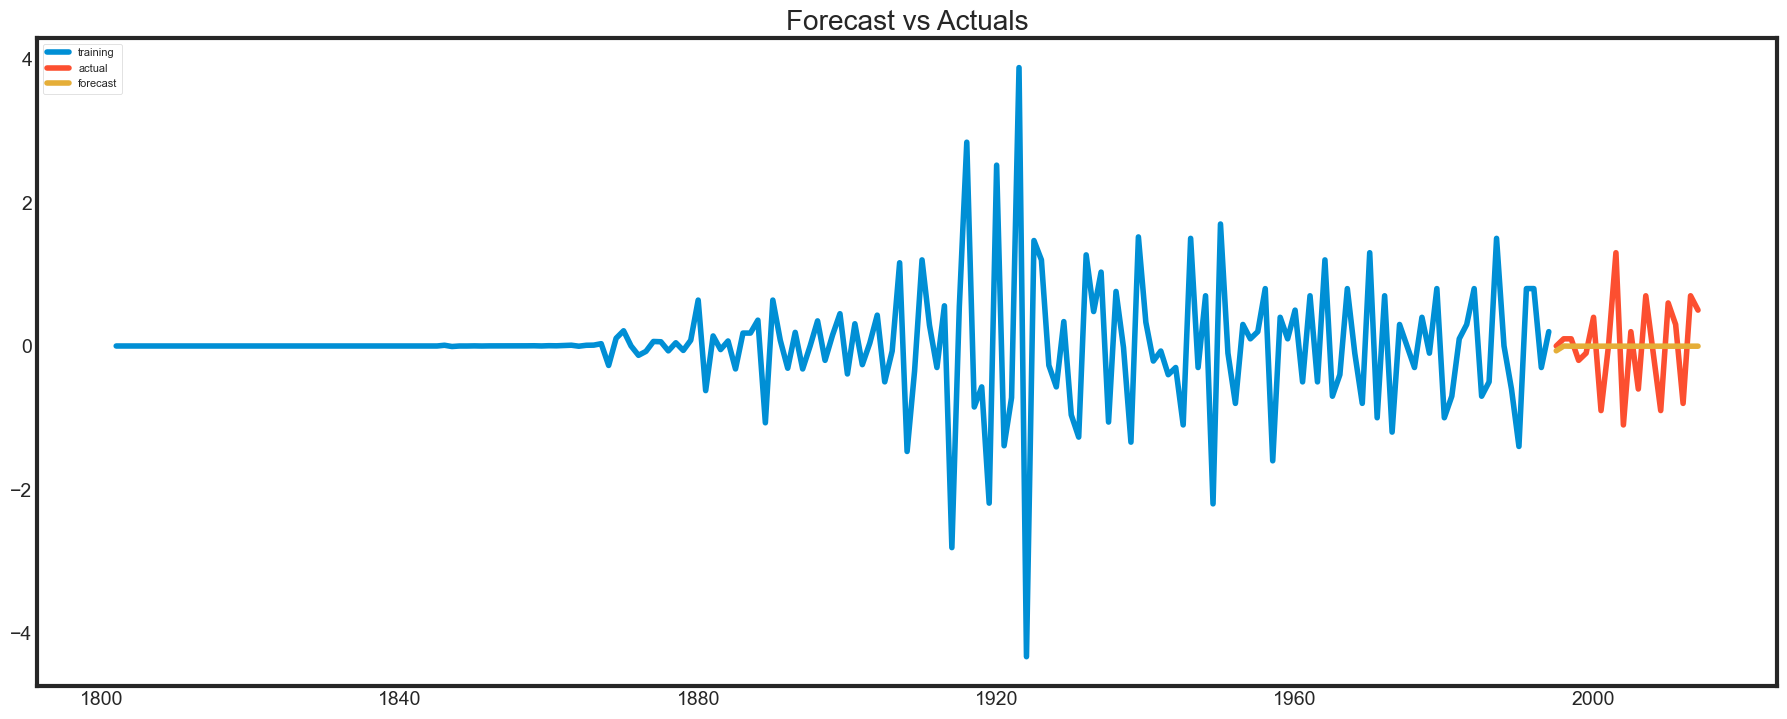

In [97]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***4)Auto ARIMA Model***

In [98]:
model = pm.auto_arima(train['CO2'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=466.471, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=421.365, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=384.807, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=375.489, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=333.120, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 2.616 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Obser

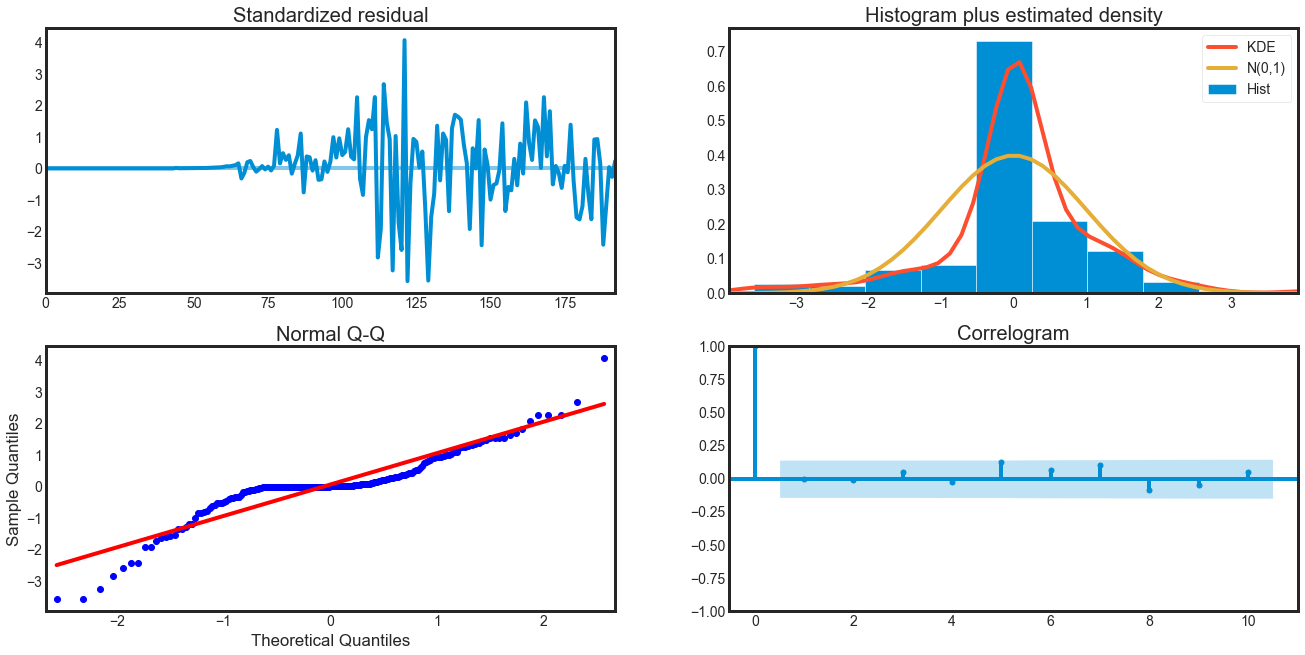

In [99]:
model.plot_diagnostics(figsize=(20,10))
plt.show()

In [100]:
pred = model.predict(start=start,end=end)
print(pred)

[-1.03647077e-01 -1.78015495e-02  1.26157439e-02  1.42374789e-03
 -1.50034166e-03 -9.05761583e-05  1.74696750e-04  2.00534547e-06
 -1.99364217e-05  7.17376122e-07]


In [101]:
stationary_aa_acc = forecast_accuracy(pred, test.values)
stationary_aa_acc

{'mape': inf,
 'me': -0.020884256946205406,
 'mae': 0.4825341311535301,
 'mpe': nan,
 'rmse': 0.6126499765214826}

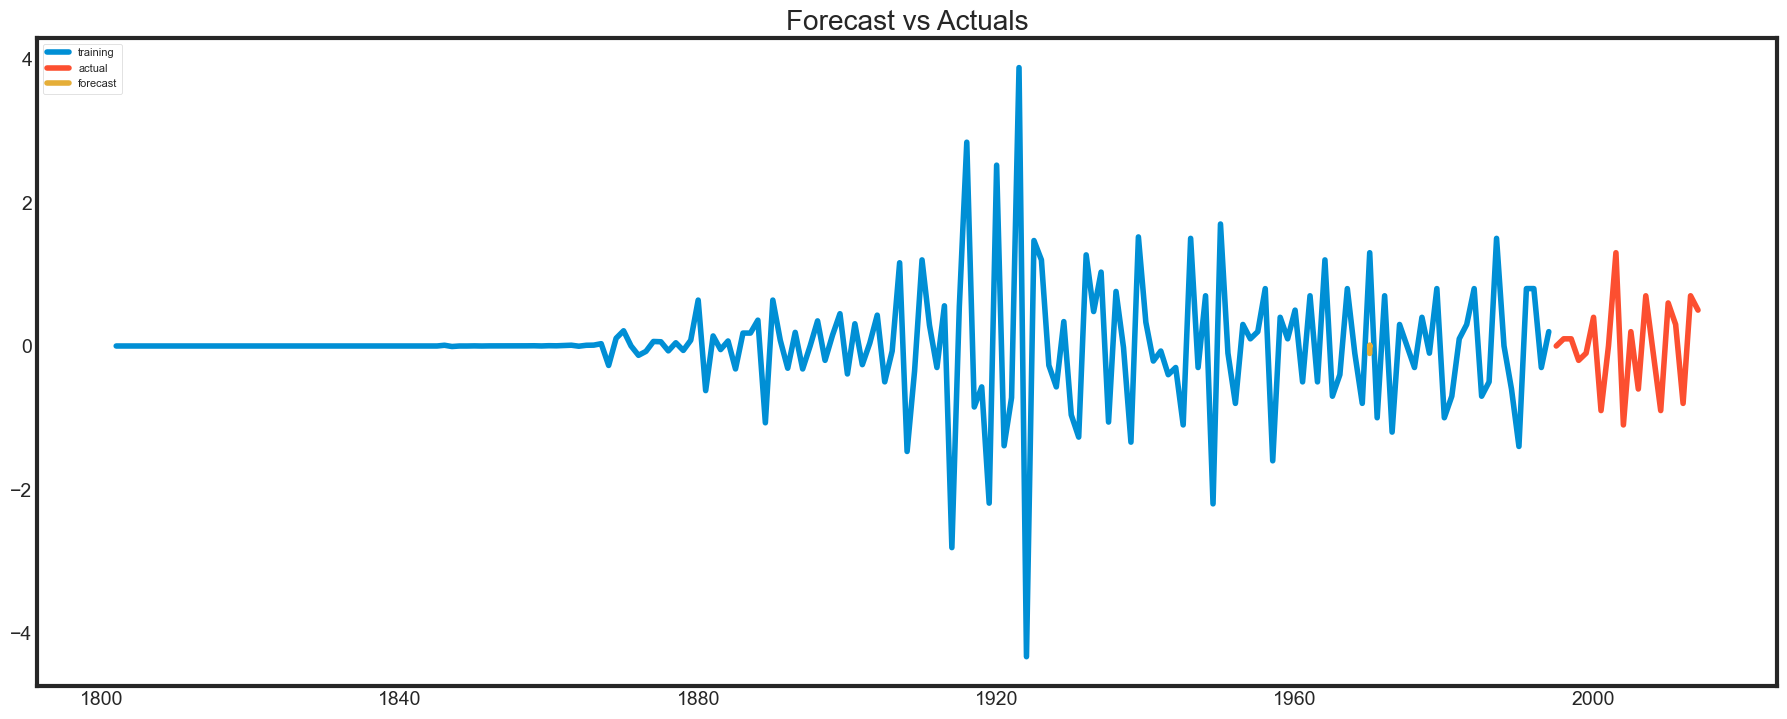

In [102]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***Comparing RMSE values of Models***

In [103]:
data1 = {"MODEL":pd.Series(["ARIMA","Auto Regressor","Moving Average","Auto ARIMA"]),"RMSE_Values":pd.Series([stationary_arima_acc["rmse"],stationary_ar_acc["rmse"],
stationary_ma_acc["rmse"],stationary_aa_acc["rmse"]]),"MAPE_values":pd.Series([stationary_arima_acc["mape"],stationary_ar_acc["mape"],stationary_ma_acc["mape"],stationary_aa_acc["mape"]]),
"ME_values":pd.Series([stationary_arima_acc["me"],stationary_ar_acc["me"],stationary_ma_acc["me"],stationary_aa_acc["me"]]),
"MAE_values":pd.Series([stationary_arima_acc["mae"],stationary_ar_acc["mae"],stationary_ma_acc["mae"],stationary_aa_acc["mae"]]),
        "MPE_values":pd.Series([stationary_arima_acc["mpe"],stationary_ar_acc["mpe"],stationary_ma_acc["mpe"],stationary_aa_acc["mpe"]])}

table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values  MAPE_values  ME_values  MAE_values  MPE_values
2  Moving Average     0.611837          inf  -0.015789    0.481158        -inf
3      Auto ARIMA     0.612650          inf  -0.020884    0.482534         NaN
0           ARIMA     0.614737          inf  -0.038459    0.487829         NaN
1  Auto Regressor     0.623329          inf  -0.027302    0.495972         NaN

# Model Building On Non-Stationary Data / Original Data

In [104]:
data.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

In [106]:
# create Training and Test
train = data[:195]
test = data[195:]

print(train.shape,test.shape)

(195, 1) (20, 1)


In [107]:
train

CO2
Year                
1800-01-01   0.00568
1801-01-01   0.00561
1802-01-01   0.00555
1803-01-01   0.00548
1804-01-01   0.00542
...              ...
1990-01-01  15.70000
1991-01-01  15.20000
1992-01-01  15.50000
1993-01-01  15.50000
1994-01-01  15.70000

[195 rows x 1 columns]

In [108]:
test

CO2
Year            
1995-01-01  15.9
1996-01-01  16.2
1997-01-01  16.6
1998-01-01  16.8
1999-01-01  16.9
2000-01-01  17.4
2001-01-01  17.0
2002-01-01  16.6
2003-01-01  17.5
2004-01-01  17.3
2005-01-01  17.3
2006-01-01  16.7
2007-01-01  16.8
2008-01-01  16.8
2009-01-01  15.9
2010-01-01  15.6
2011-01-01  15.6
2012-01-01  14.8
2013-01-01  14.7
2014-01-01  15.1

**ACF (Autocorrelation Function) Plot & PACF (Partial Autocorrelation Function) Plot for Non-Stationary Data**

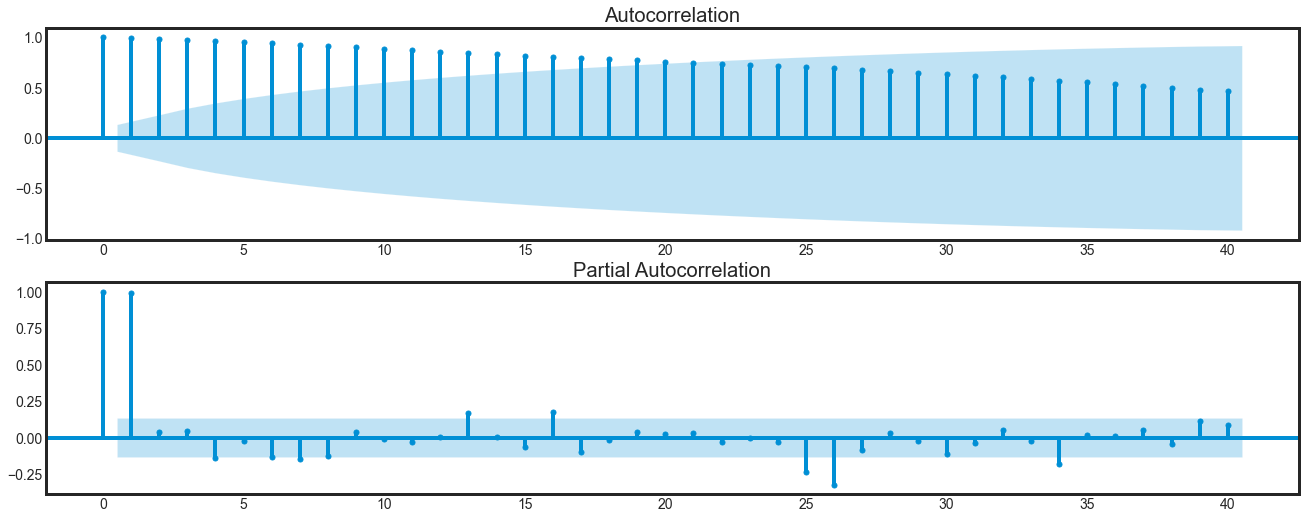

In [109]:
#ACF and PACF plot Non-Stationary Data
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

***Hyper-parameter Tuning : Finding out optimal (p,d,q)***

In [110]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [111]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [112]:
# evaluate parameters
p_values = [0,1,2,3,4,5]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.175
ARIMA(0, 0, 1) RMSE=5.218
ARIMA(0, 0, 2) RMSE=3.120
ARIMA(0, 0, 3) RMSE=1.965
ARIMA(0, 0, 4) RMSE=1.886
ARIMA(0, 1, 0) RMSE=0.438
ARIMA(0, 1, 1) RMSE=0.439
ARIMA(0, 1, 2) RMSE=0.439
ARIMA(0, 1, 3) RMSE=0.424
ARIMA(0, 1, 4) RMSE=0.424
ARIMA(0, 2, 0) RMSE=0.612
ARIMA(0, 2, 1) RMSE=0.451
ARIMA(0, 2, 2) RMSE=0.454
ARIMA(0, 2, 3) RMSE=0.458
ARIMA(0, 2, 4) RMSE=0.443
ARIMA(0, 3, 0) RMSE=1.037
ARIMA(0, 3, 1) RMSE=0.613
ARIMA(0, 3, 2) RMSE=0.450
ARIMA(0, 3, 3) RMSE=0.452
ARIMA(0, 3, 4) RMSE=0.460
ARIMA(0, 4, 0) RMSE=1.853
ARIMA(0, 4, 1) RMSE=1.039
ARIMA(0, 4, 2) RMSE=0.679
ARIMA(0, 4, 3) RMSE=0.431
ARIMA(0, 4, 4) RMSE=0.441
ARIMA(1, 0, 0) RMSE=0.437
ARIMA(1, 0, 1) RMSE=0.438
ARIMA(1, 0, 2) RMSE=0.438
ARIMA(1, 0, 3) RMSE=0.423
ARIMA(1, 0, 4) RMSE=0.423
ARIMA(1, 1, 0) RMSE=0.439
ARIMA(1, 1, 1) RMSE=0.433
ARIMA(1, 1, 2) RMSE=0.431
ARIMA(1, 1, 3) RMSE=0.437
ARIMA(1, 1, 4) RMSE=0.440
ARIMA(1, 2, 0) RMSE=0.544
ARIMA(1, 2, 1) RMSE=0.453
ARIMA(1, 2, 2) RMSE=0.446
ARIMA(1, 2,

***1) ARIMA Model***

In [117]:
model_arima = ARIMA(train['CO2'],order = (5,1,4))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  195
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -157.070
Date:                Sat, 12 Feb 2022   AIC                            334.140
Time:                        13:34:57   BIC                            366.819
Sample:                    01-01-1800   HQIC                           347.373
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1602      0.519      2.237      0.025       0.144       2.177
ar.L2         -0.2156      0.507     -0.425      0.671      -1.210       0.779
ar.L3         -0.4339      0.435     -0.996      0.319      -1.287       0.420
ar.L4          0.1408      0.318      0.442      0.658      -0.483       0.765
ar.L5          0.1020      0.062      1.638      0.101      -0.020       0.224
ma.L1         -1.2099      0.535     -2.262      0.024      -2.258      -0.162
ma.L2          0.1516      0.536      0.283      0.777      -0.899       1.202
ma.L3          0.6669      0.447      1.491      0.136      -0.210       1.544
ma.L4         -0.2863      0.375     -0.764      0.445      -1.021       0.449
sigma2         0.2949      0.023     12.824      0.000       0.250       0.340
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                70.71
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):            4304.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
# make prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01    15.665569
1996-01-01    15.475909
1997-01-01    15.279581
1998-01-01    15.123925
1999-01-01    15.083518
2000-01-01    15.125177
2001-01-01    15.202778
2002-01-01    15.259419
2003-01-01    15.268757
2004-01-01    15.235447
2005-01-01    15.185384
2006-01-01    15.146321
2007-01-01    15.133342
2008-01-01    15.144693
2009-01-01    15.167164
2010-01-01    15.185814
2011-01-01    15.191869
2012-01-01    15.185395
2013-01-01    15.172808
2014-01-01    15.161890
Freq: AS-JAN, Name: predicted_mean, dtype: float64


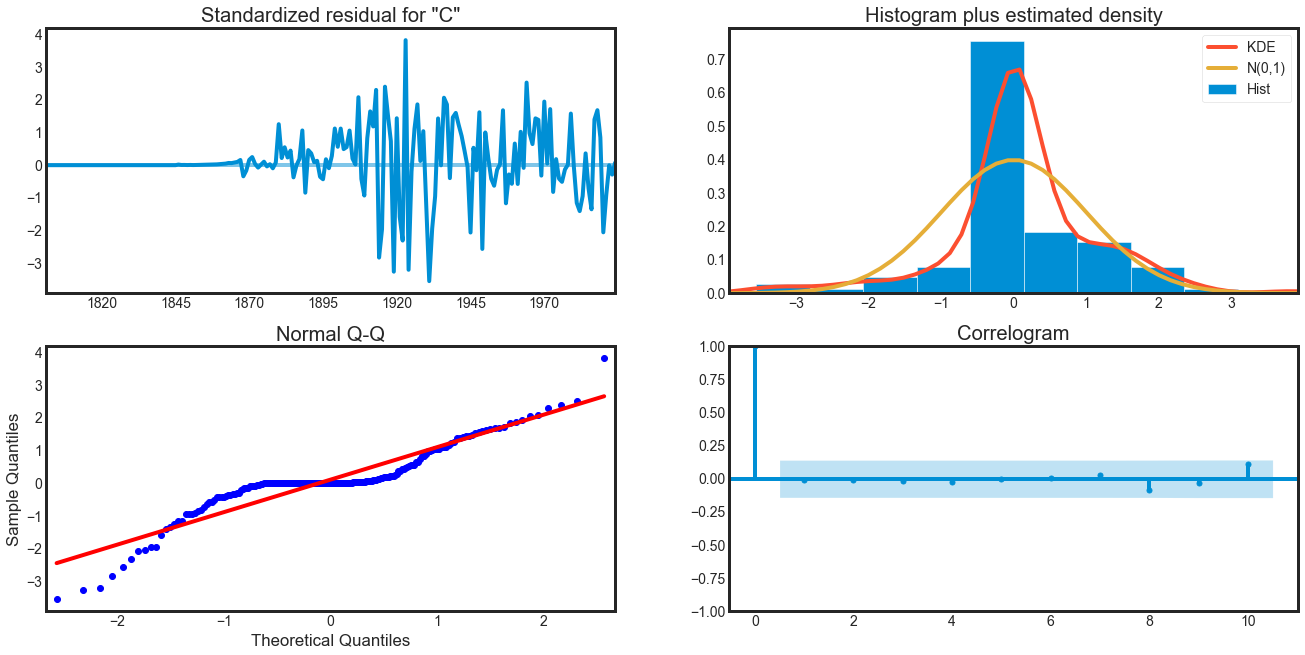

In [119]:
model_arima.plot_diagnostics(figsize=(20,10))
plt.show()

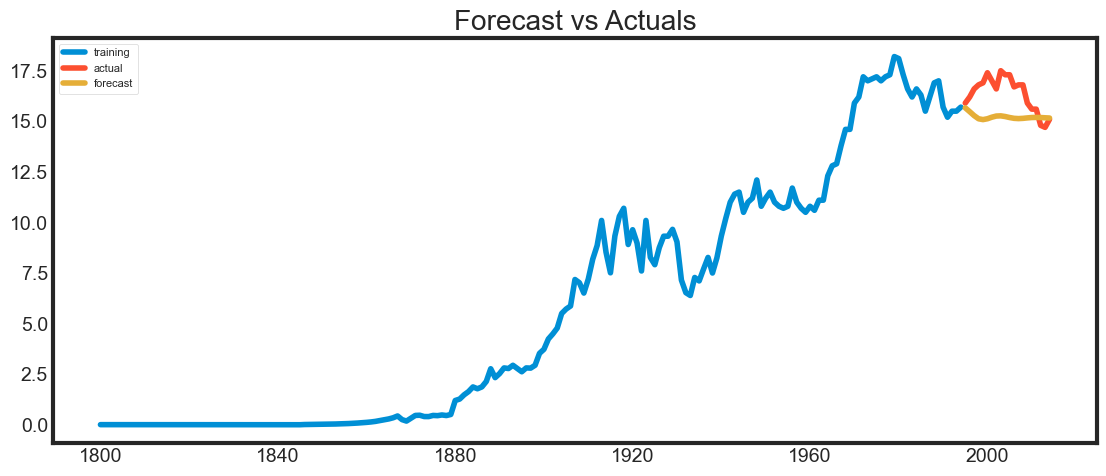

In [120]:
# plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_arima, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [121]:
ns_arima_acc = forecast_accuracy(pred_arima,test.CO2)
ns_arima_acc

{'mape': 0.07421975445083713,
 'me': -1.155262027249206,
 'mae': 1.2472713322239215,
 'mpe': -0.06798948537639107,
 'rmse': 1.4409857987123016}

***2) Auto ARIMA Model***

In [122]:
model_auto = pm.auto_arima(train['CO2'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=327.249, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328.890, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.788, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=329.304, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=330.241, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.587 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -161.625
Date:                Sat, 12 Feb 2022   AIC                            327.249
Time:                        13:35:01   BIC                            333.785
Sample:                             0   HQIC                           329.896
                                - 195                                         
Co

In [123]:
pred_auto_arima = model_auto.predict(start=start,end=end)
print(pred_auto_arima)

[15.78089841 15.86179682 15.94269523 16.02359364 16.10449205 16.18539046
 16.26628887 16.34718728 16.42808569 16.50898411]


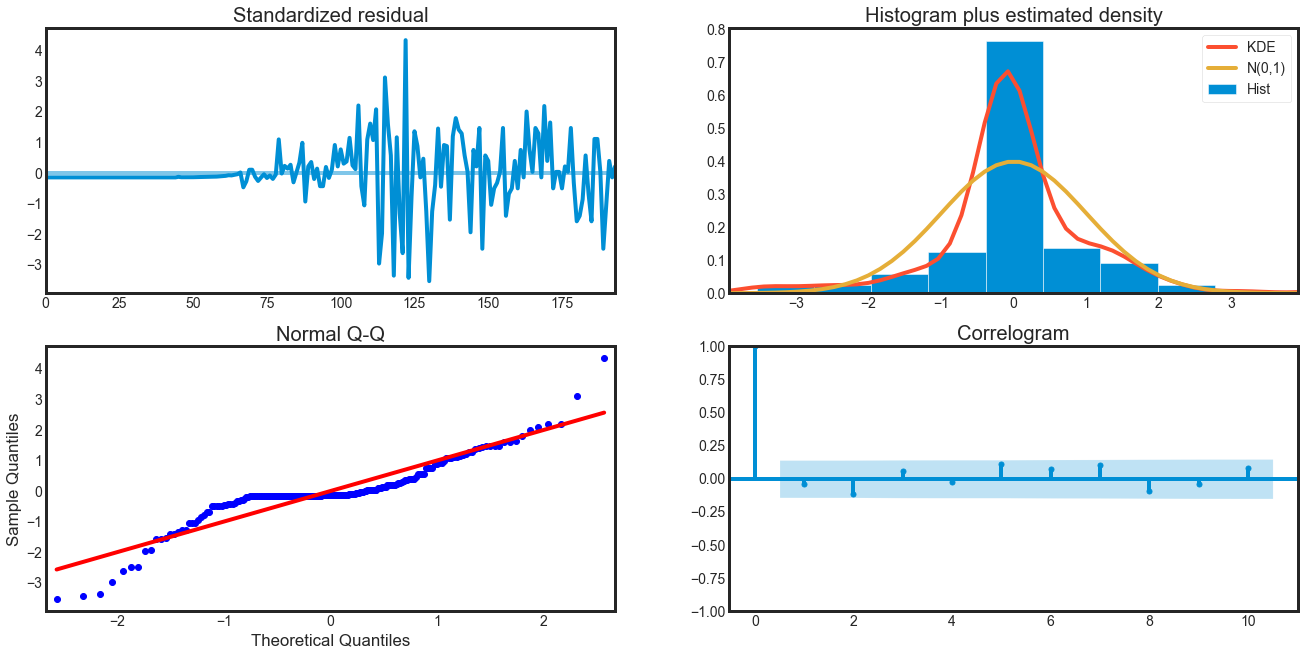

In [124]:
model_auto.plot_diagnostics(figsize=(20,10))
plt.show()

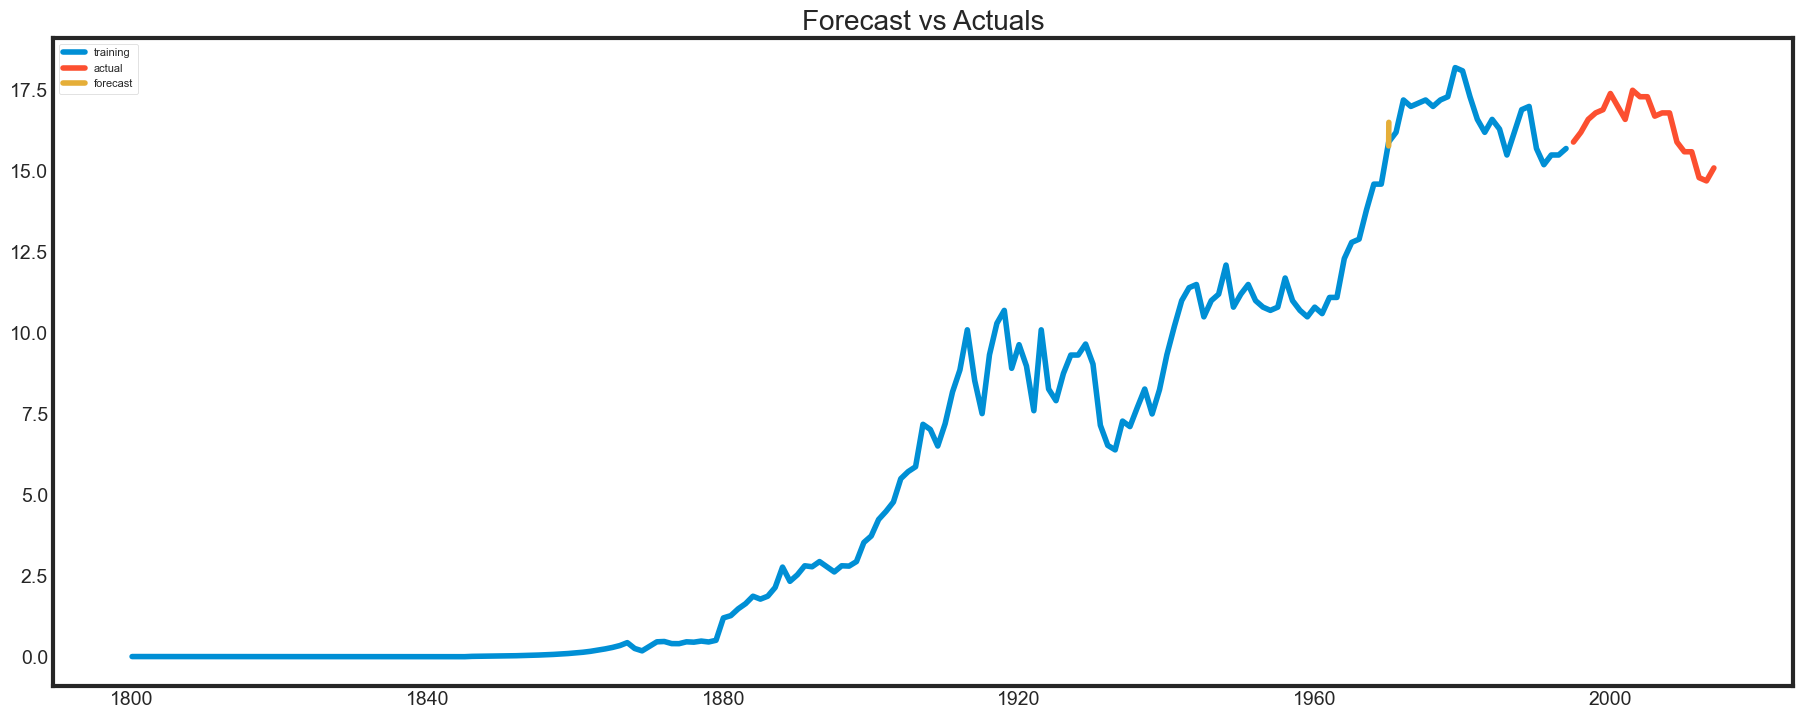

In [125]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_auto_arima, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***3) Auto Regressor (AR) Model***

In [126]:
model_ar = AutoReg(train,lags = 1).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  195
Model:                     AutoReg(1)   Log Likelihood                -161.622
Method:               Conditional MLE   S.D. of innovations              0.557
Date:                Sat, 12 Feb 2022   AIC                             -1.141
Time:                        13:35:03   BIC                             -1.090
Sample:                    01-01-1801   HQIC                            -1.120
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0784      0.055      1.420      0.156      -0.030       0.187
CO2.L1         1.0004      0.007    149.772      0.000       0.987       1.014
                                    Roots           

In [127]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1995-01-01    15.785295
1996-01-01    15.870628
1997-01-01    15.955998
1998-01-01    16.041406
1999-01-01    16.126852
2000-01-01    16.212335
2001-01-01    16.297856
2002-01-01    16.383414
2003-01-01    16.469010
2004-01-01    16.554643
2005-01-01    16.640314
2006-01-01    16.726023
2007-01-01    16.811770
2008-01-01    16.897554
2009-01-01    16.983376
2010-01-01    17.069236
2011-01-01    17.155133
2012-01-01    17.241069
2013-01-01    17.327042
2014-01-01    17.413052
Freq: AS-JAN, dtype: float64


In [128]:
ns_ar_acc = forecast_accuracy(pred_ar.values, test.values)
ns_ar_acc

{'mape': 0.04987211514115063,
 'me': 0.22310031674086298,
 'mae': 0.7960986374051282,
 'mpe': 0.01637588551167463,
 'rmse': 0.9978427121395914}

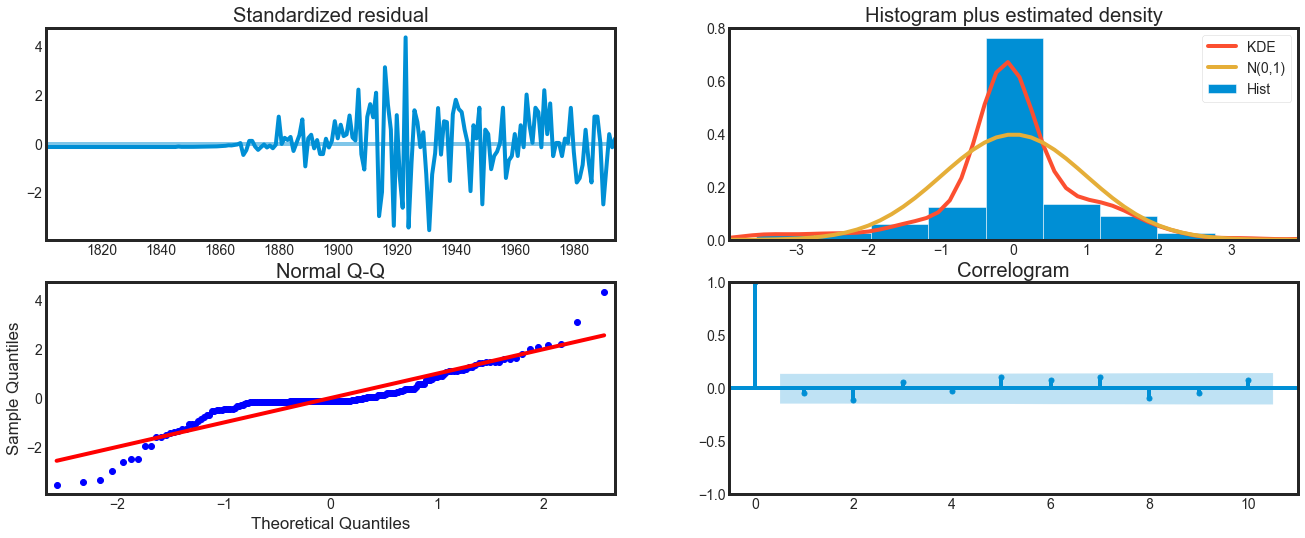

In [129]:
model_ar.plot_diagnostics(figsize=(20,8))
plt.show()

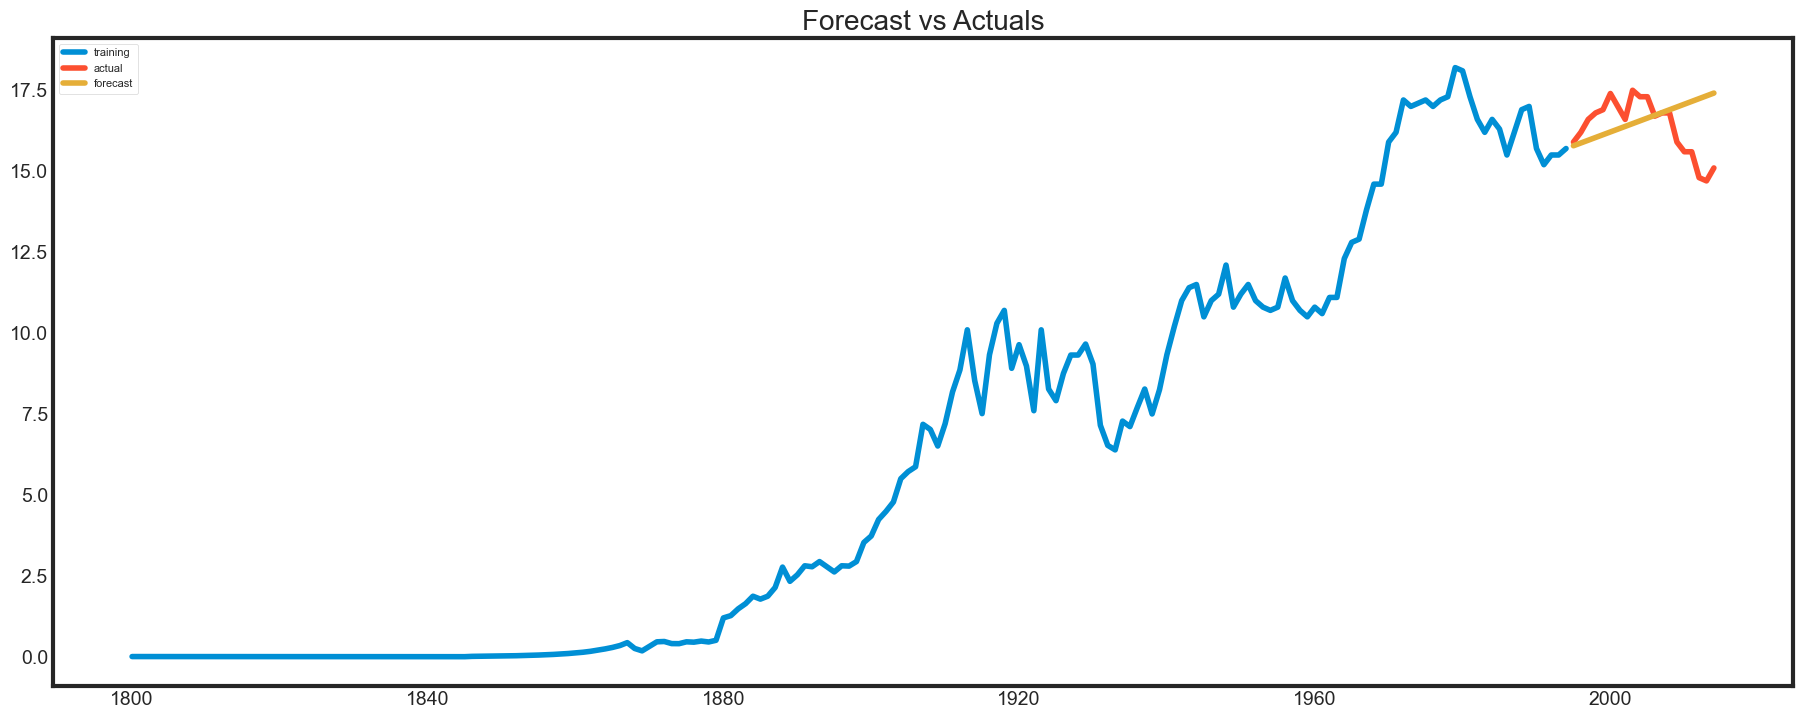

In [130]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***4) Single Exponential Smoothing***

In [131]:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level = 0.2,optimized = False)
fit2 = SimpleExpSmoothing(train).fit(smoothing_level = 0.8,optimized = False)

Text(0.5, 1.0, 'Fitted values Vs Original Values')

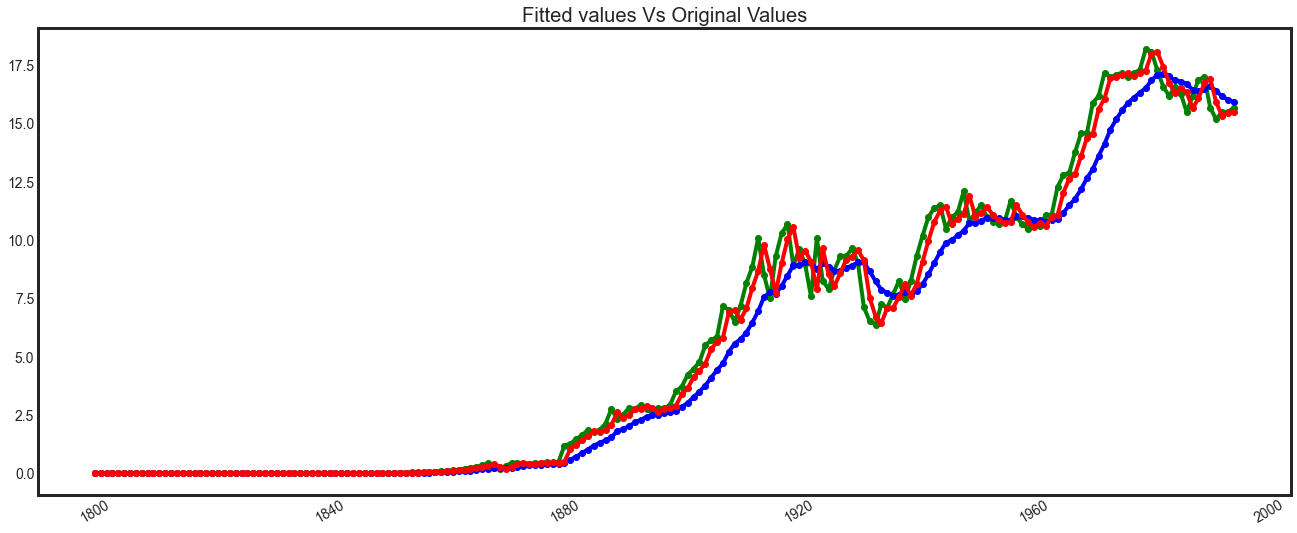

In [132]:
plt.figure(figsize=(20,8))
plt.plot(train,marker = 'o',color = 'green')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')
plt.title('Fitted values Vs Original Values')

In [133]:
pred_ses = fit1.predict(start = len(train),end = len(train)+len(test)-1)
pred_ses

1995-01-01    15.88967
1996-01-01    15.88967
1997-01-01    15.88967
1998-01-01    15.88967
1999-01-01    15.88967
2000-01-01    15.88967
2001-01-01    15.88967
2002-01-01    15.88967
2003-01-01    15.88967
2004-01-01    15.88967
2005-01-01    15.88967
2006-01-01    15.88967
2007-01-01    15.88967
2008-01-01    15.88967
2009-01-01    15.88967
2010-01-01    15.88967
2011-01-01    15.88967
2012-01-01    15.88967
2013-01-01    15.88967
2014-01-01    15.88967
Freq: AS-JAN, dtype: float64

In [134]:
ns_ses_acc = forecast_accuracy(pred_ses,test.CO2)
ns_ses_acc

{'mape': 0.05140341313825274,
 'me': -0.48532979923801467,
 'mae': 0.8501648996190075,
 'mpe': -0.027004457582465242,
 'rmse': 0.9682045310926879}

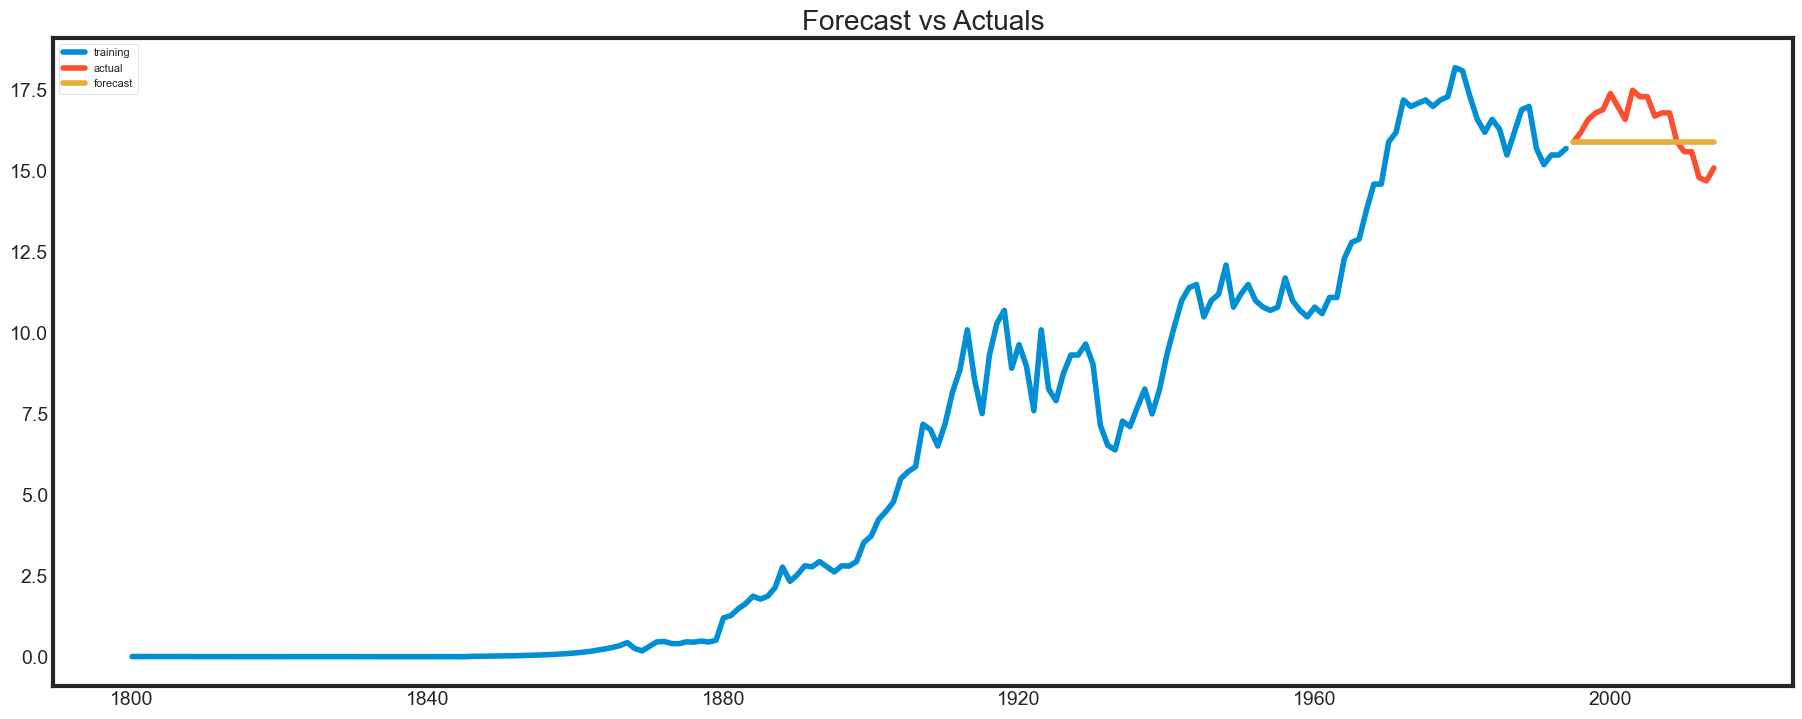

In [135]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***5) Double Exponential Smoothing or Holt's method***

In [136]:
#fit1 = Holt(train1).fit()
fit3 = Holt(train,exponential=True,damped_trend=False).fit()
fit3

Text(0.5, 1.0, 'Fitted values Vs Original Values')

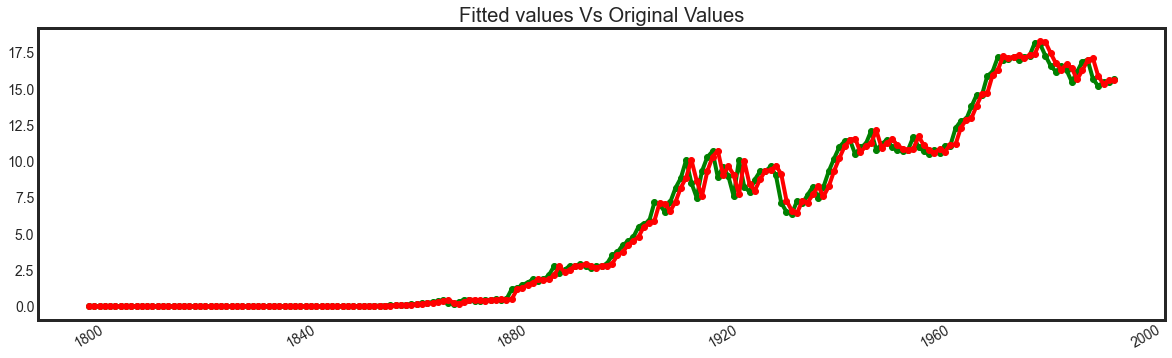

In [137]:
plt.figure(figsize=(18,5))
plt.plot(train,marker = 'o',color = 'green')
plt.xticks(rotation=30)
plt.plot(fit3.fittedvalues,marker = 'o',color = 'red')
plt.title('Fitted values Vs Original Values')

In [138]:
pred_holt = fit3.predict(start = len(train),end = len(train)+len(test)-1)
pred_holt

1995-01-01    15.809030
1996-01-01    15.923026
1997-01-01    16.037845
1998-01-01    16.153491
1999-01-01    16.269971
2000-01-01    16.387291
2001-01-01    16.505457
2002-01-01    16.624476
2003-01-01    16.744352
2004-01-01    16.865093
2005-01-01    16.986704
2006-01-01    17.109192
2007-01-01    17.232564
2008-01-01    17.356825
2009-01-01    17.481982
2010-01-01    17.608042
2011-01-01    17.735011
2012-01-01    17.862895
2013-01-01    17.991702
2014-01-01    18.121437
Freq: AS-JAN, dtype: float64

In [139]:
ns_des_acc = forecast_accuracy(pred_holt,test.CO2)
ns_des_acc

{'mape': 0.06935424326579644,
 'me': 0.5653193641236148,
 'mae': 1.0870932688858914,
 'mpe': 0.03873756403375857,
 'rmse': 1.490779252835895}

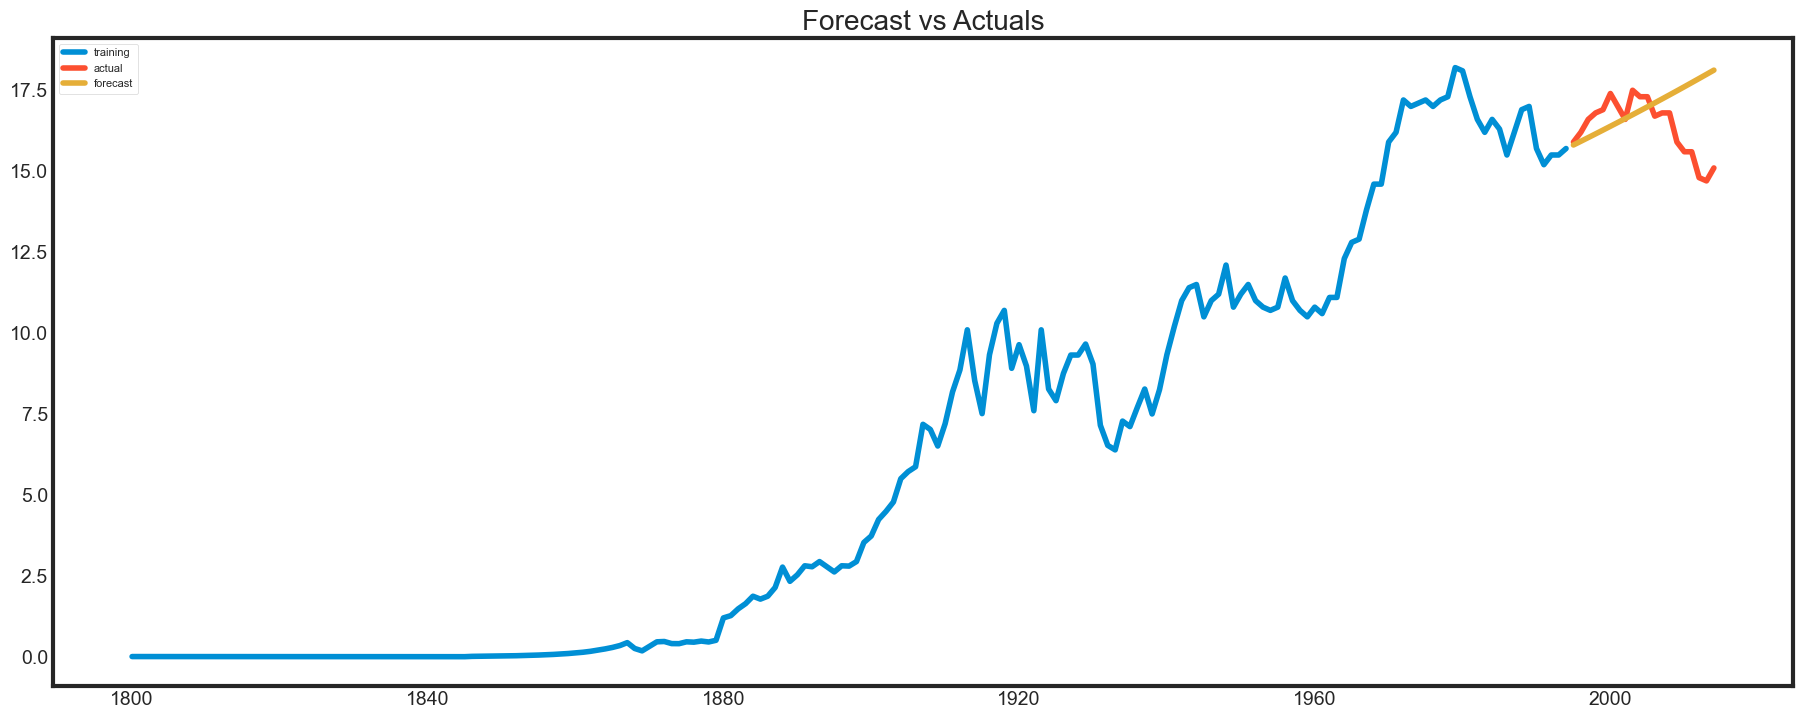

In [140]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_holt, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***6) Triple Exponential Smoothing or Holt - Winter's Method***

In [141]:
# seasonality=additive , Trend=additive
# holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=2,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = start,end = end)

In [142]:
ns_tes_add_add_acc = forecast_accuracy(pred_hwe_add_add,test.CO2)
ns_tes_add_add_acc

{'mape': 0.05702150333079846,
 'me': -0.3115203490442946,
 'mae': 0.9298780196096029,
 'mpe': -0.01595737117269246,
 'rmse': 1.022881418050743}

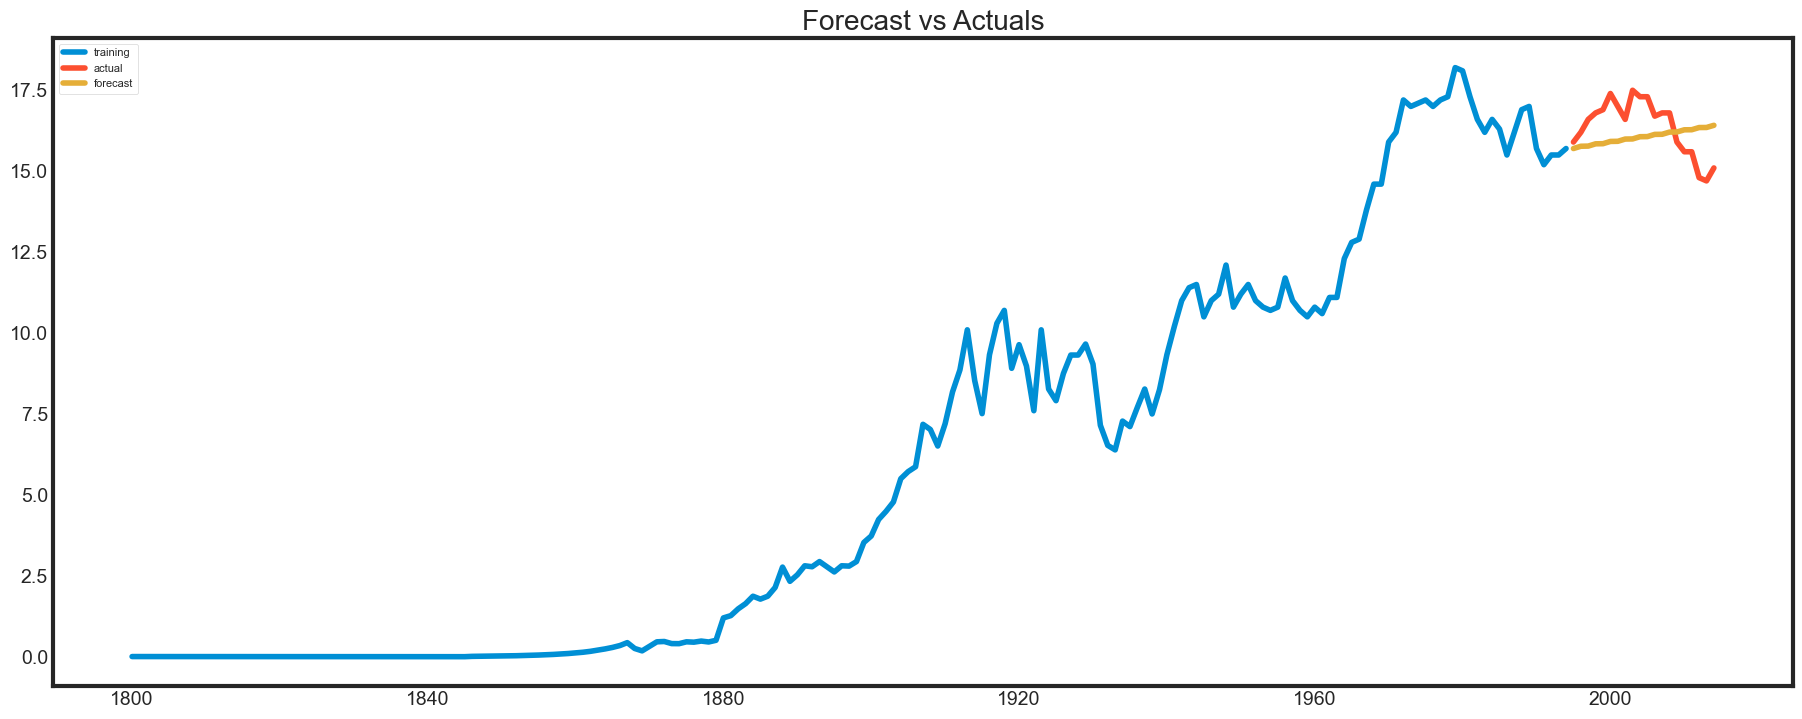

In [143]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***7) Triple Exponential Smoothing with multiplicative seasonality and additive trend***

In [144]:
# seasonality=multiplicative , Trend=additive
# holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="add",seasonal_periods=2).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = start,end = end)

In [145]:
ns_tes_mul_add_acc = forecast_accuracy(pred_hwe_mul_add,test.CO2)
ns_tes_mul_add_acc

{'mape': 0.059252706906960405,
 'me': 0.12051493477158574,
 'mae': 0.9425197016781599,
 'mpe': 0.011001423657896164,
 'rmse': 1.1784773615335713}

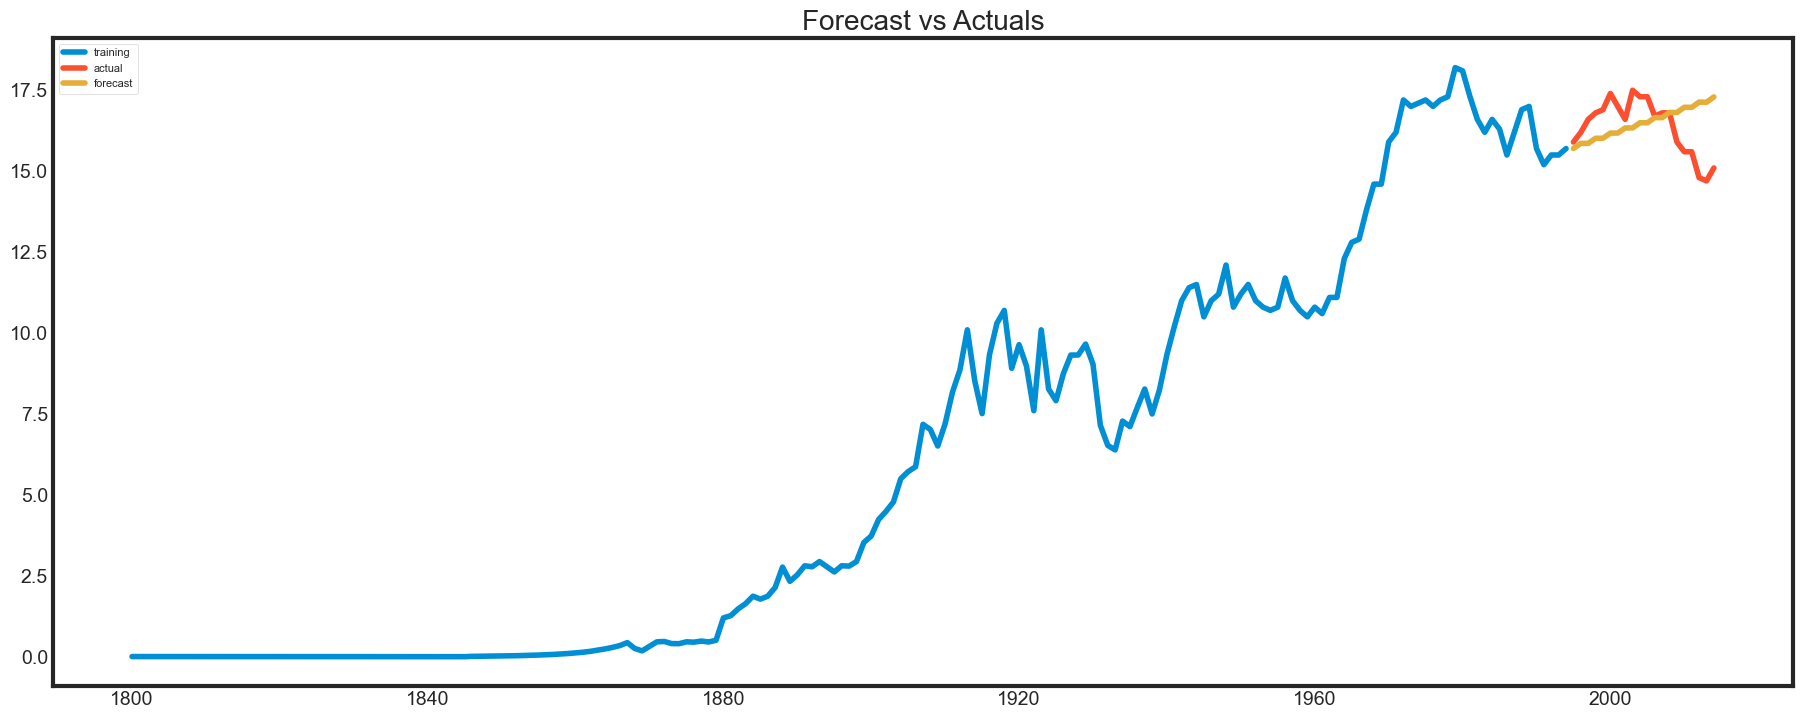

In [146]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

***8) Triple Exponential Smoothing with multiplicative seasonality and multiplicative trend***

In [147]:
# seasonality=multiplicative , Trend=multiplicative
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_mul = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="mul",seasonal_periods=2).fit()
pred_hwe_mul_mul = hwe_model_mul_add.predict(start = start,end = end)

In [148]:
ns_tes_mul_mul_acc = forecast_accuracy(pred_hwe_mul_mul,test.CO2)
ns_tes_mul_mul_acc

{'mape': 0.059252706906960405,
 'me': 0.12051493477158574,
 'mae': 0.9425197016781599,
 'mpe': 0.011001423657896164,
 'rmse': 1.1784773615335713}

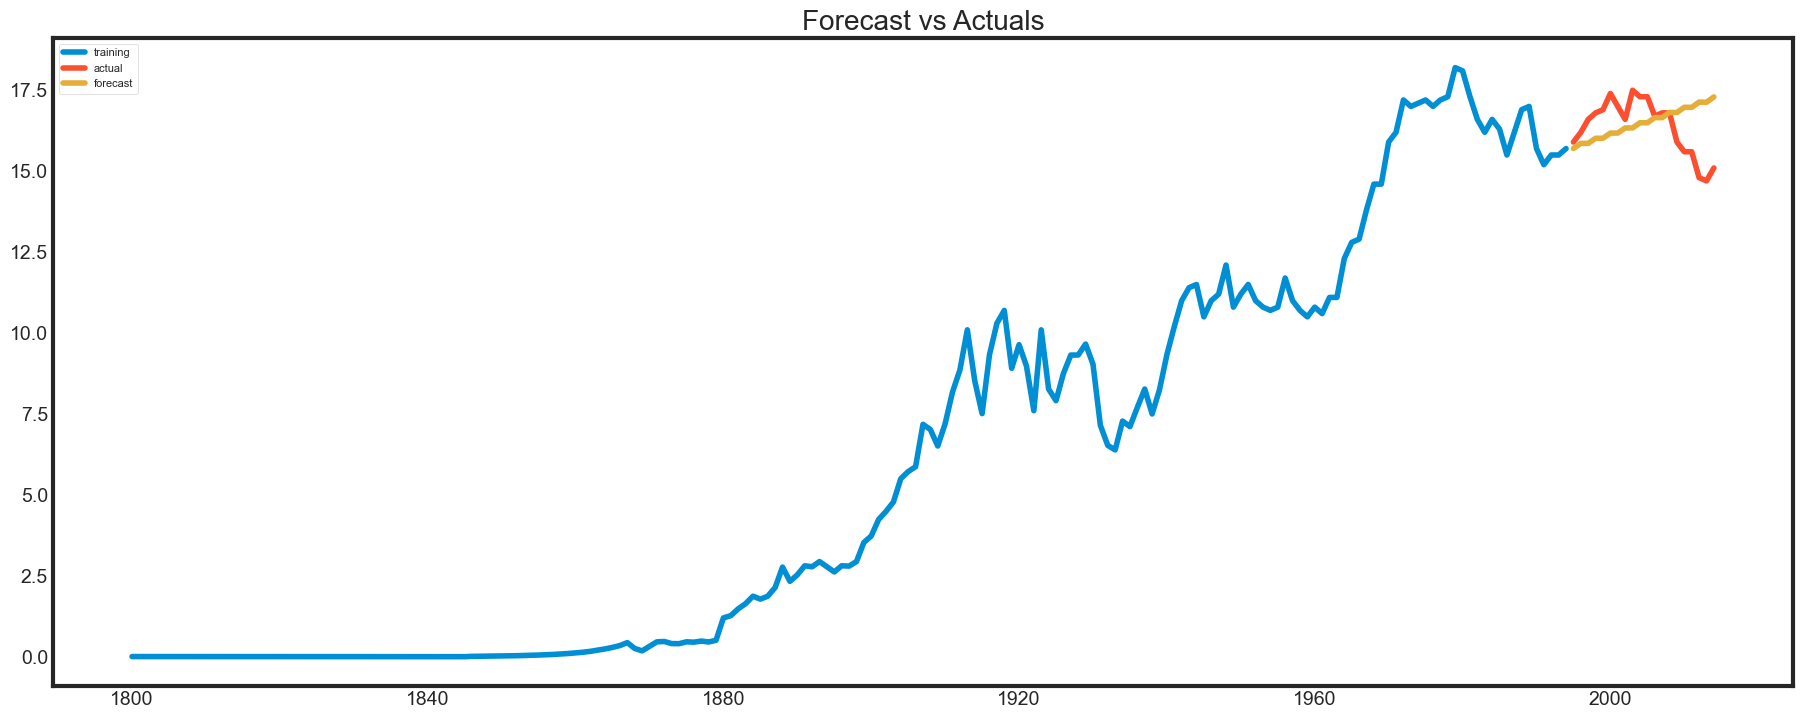

In [149]:
# plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


## Forecasting Accuracy

In [150]:
data2 = {"MODEL":pd.Series(["ARIMA(5,1,4)","Auto Regressor","single exponential smoothing","Double exponential smoothing","Triple exponential smoothing(additive seasonality & additive trend)","Triple exponential smoothing(multiplicative seasonality & additive trend)","Triple exponential smoothing(multiplicative seasonality & multiplicative trend)"]),
"RMSE_values":pd.Series([ns_arima_acc["rmse"],ns_ar_acc["rmse"],ns_ses_acc["rmse"],ns_des_acc["rmse"],ns_tes_add_add_acc["rmse"],ns_tes_mul_add_acc["rmse"],ns_tes_mul_mul_acc["rmse"]]),
"MAPE_values":pd.Series([ns_arima_acc["mape"],ns_ar_acc["mape"],ns_ses_acc["mape"],ns_des_acc["mape"],ns_tes_add_add_acc["mape"],ns_tes_mul_add_acc["mape"],ns_tes_mul_mul_acc["mape"]]),
"ME_values":pd.Series([ns_arima_acc["me"],ns_ar_acc["me"],ns_ses_acc["me"],ns_des_acc["me"],ns_tes_add_add_acc["me"],ns_tes_mul_add_acc["me"],ns_tes_mul_mul_acc["me"]]),
"MAE_values":pd.Series([ns_arima_acc["mae"],ns_ar_acc["mae"],ns_ses_acc["mae"],ns_des_acc["mae"],ns_tes_add_add_acc["mae"],ns_tes_mul_add_acc["mae"],ns_tes_mul_mul_acc["mae"]]),
"MPE_values":pd.Series([ns_arima_acc["mpe"],ns_ar_acc["mpe"],ns_ses_acc["mpe"],ns_des_acc["mpe"],ns_tes_add_add_acc["mpe"],ns_tes_mul_add_acc["mpe"],ns_tes_mul_mul_acc["mpe"]])}

table_rmse=pd.DataFrame(data2)
table_rmse.sort_values(['MAPE_values'])

MODEL  RMSE_values  \
1                                     Auto Regressor     0.997843   
2                       single exponential smoothing     0.968205   
4  Triple exponential smoothing(additive seasonal...     1.022881   
5  Triple exponential smoothing(multiplicative se...     1.178477   
6  Triple exponential smoothing(multiplicative se...     1.178477   
3                       Double exponential smoothing     1.490779   
0                                       ARIMA(5,1,4)     1.440986   

   MAPE_values  ME_values  MAE_values  MPE_values  
1     0.049872   0.223100    0.796099    0.016376  
2     0.051403  -0.485330    0.850165   -0.027004  
4     0.057022  -0.311520    0.929878   -0.015957  
5     0.059253   0.120515    0.942520    0.011001  
6     0.059253   0.120515    0.942520    0.011001  
3     0.069354   0.565319    1.087093    0.038738  
0     0.074220  -1.155262    1.247271   -0.067989

## Final Model
We have selected **ARIMA(5,1,4)** as our final model beacuse of following reasons:

least MAPE & MAE value.       
Forecasted values vs Actual values graphs capturing more information when compared to other models.

In [151]:
final_arima = ARIMA(data['CO2'],order = (5,1,4))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -170.095
Date:                Sat, 12 Feb 2022   AIC                            360.191
Time:                        13:35:14   BIC                            393.850
Sample:                    01-01-1800   HQIC                           373.792
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8607      0.750      1.147      0.251      -0.610       2.332
ar.L2          0.0347      0.567      0.061      0.951      -1.076       1.146
ar.L3         -0.3092      0.422     -0.733      0.464      -1.136       0.518
ar.L4         -0.0167      0.381     -0.044      0.965      -0.764       0.730
ar.L5          0.0948      0.064      1.483      0.138      -0.030       0.220
ma.L1         -0.8985      0.771     -1.166      0.244      -2.409       0.612
ma.L2         -0.1193      0.605     -0.197      0.843      -1.304       1.066
ma.L3          0.5230      0.480      1.089      0.276      -0.418       1.464
ma.L4         -0.0749      0.513     -0.146      0.884      -1.079       0.930
sigma2         0.2866      0.022     13.240      0.000       0.244       0.329
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                66.75
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):             257.28   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
final_arima.fittedvalues

Year
1800-01-01     0.000000
1801-01-01     0.005680
1802-01-01     0.005611
1803-01-01     0.005558
1804-01-01     0.005479
                ...    
2010-01-01    15.965228
2011-01-01    15.615739
2012-01-01    15.539445
2013-01-01    14.751952
2014-01-01    14.659949
Length: 215, dtype: float64

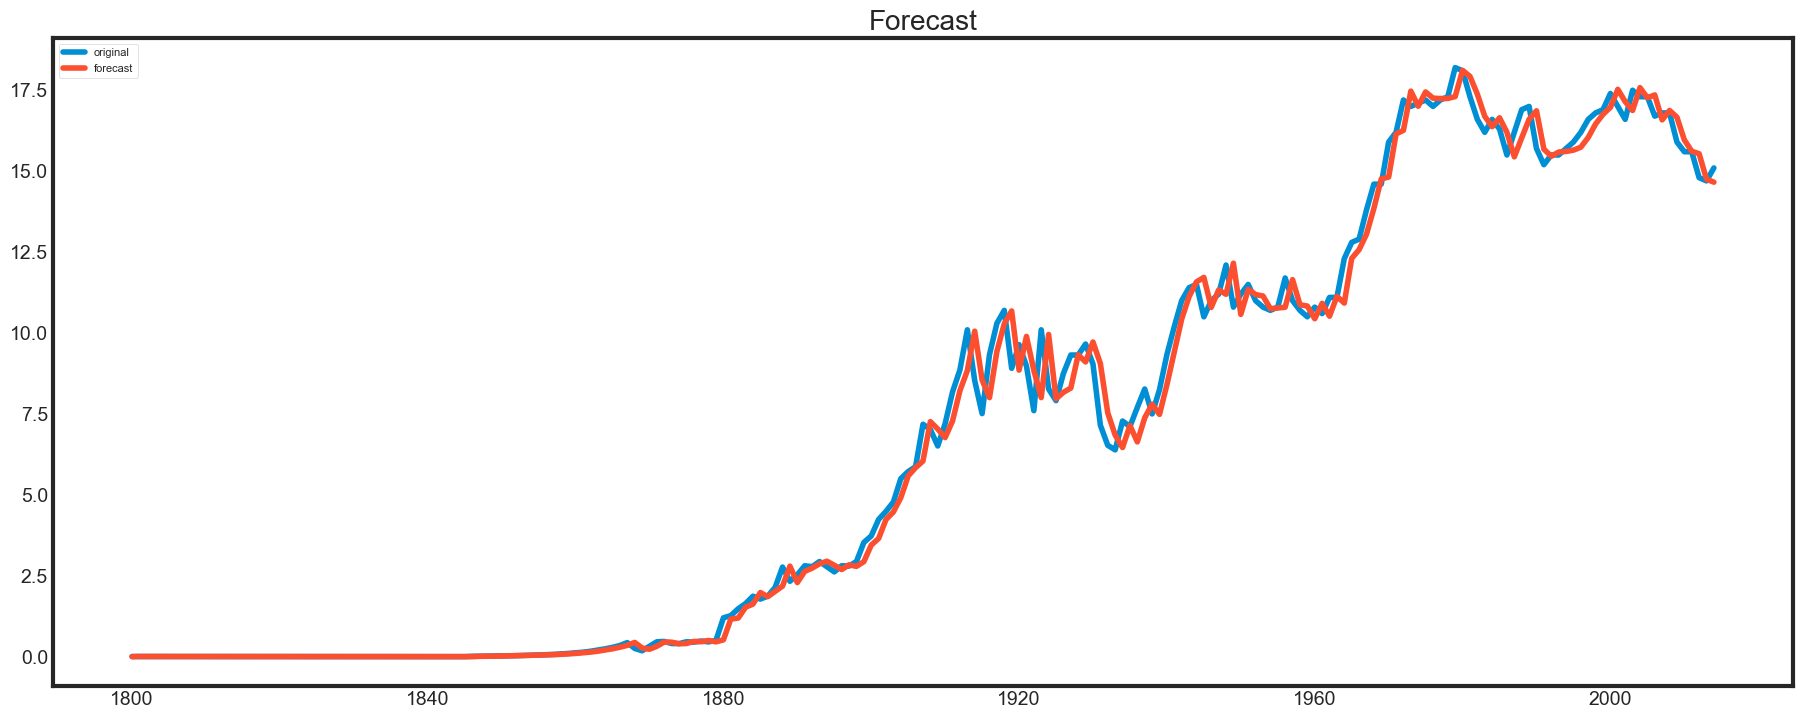

In [153]:
plt.figure(figsize=(20,8), dpi=100)
plt.plot(data, label='original')
plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Creating dataframe for Future Forecasting

In [154]:
future_dates_10=[data.index[-1]+ DateOffset(years=x)for x in range(0,11)]
future_dates_10

[Timestamp('2014-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00')]

In [155]:
future_data_10=pd.DataFrame(index=future_dates_10[1:],columns=data.columns)
future_data_10

CO2
2015-01-01  NaN
2016-01-01  NaN
2017-01-01  NaN
2018-01-01  NaN
2019-01-01  NaN
2020-01-01  NaN
2021-01-01  NaN
2022-01-01  NaN
2023-01-01  NaN
2024-01-01  NaN

In [156]:
len(future_data_10)

10

## *Forecasting for next 10 years using Final ARIMA model*

Text(0.5, 1.0, 'Forecast for next 10 years')

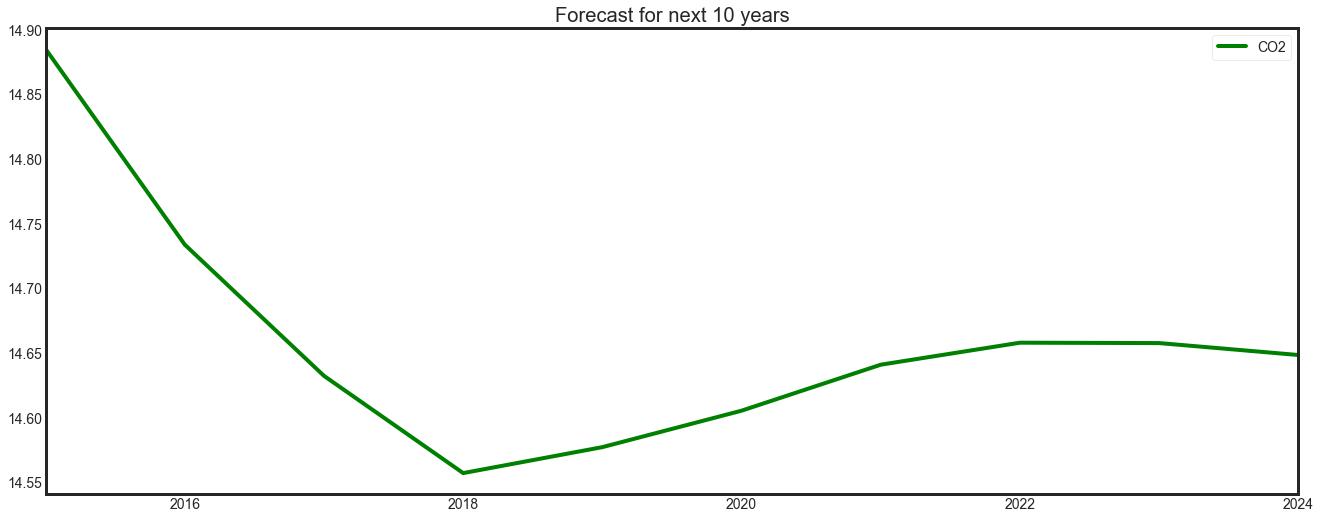

In [157]:
future_data_10['CO2'] = final_arima.predict(start = 215, end = 225, dynamic= True)  
future_data_10[['CO2']].plot(figsize=(20, 8),color = 'green')
plt.title('Forecast for next 10 years')

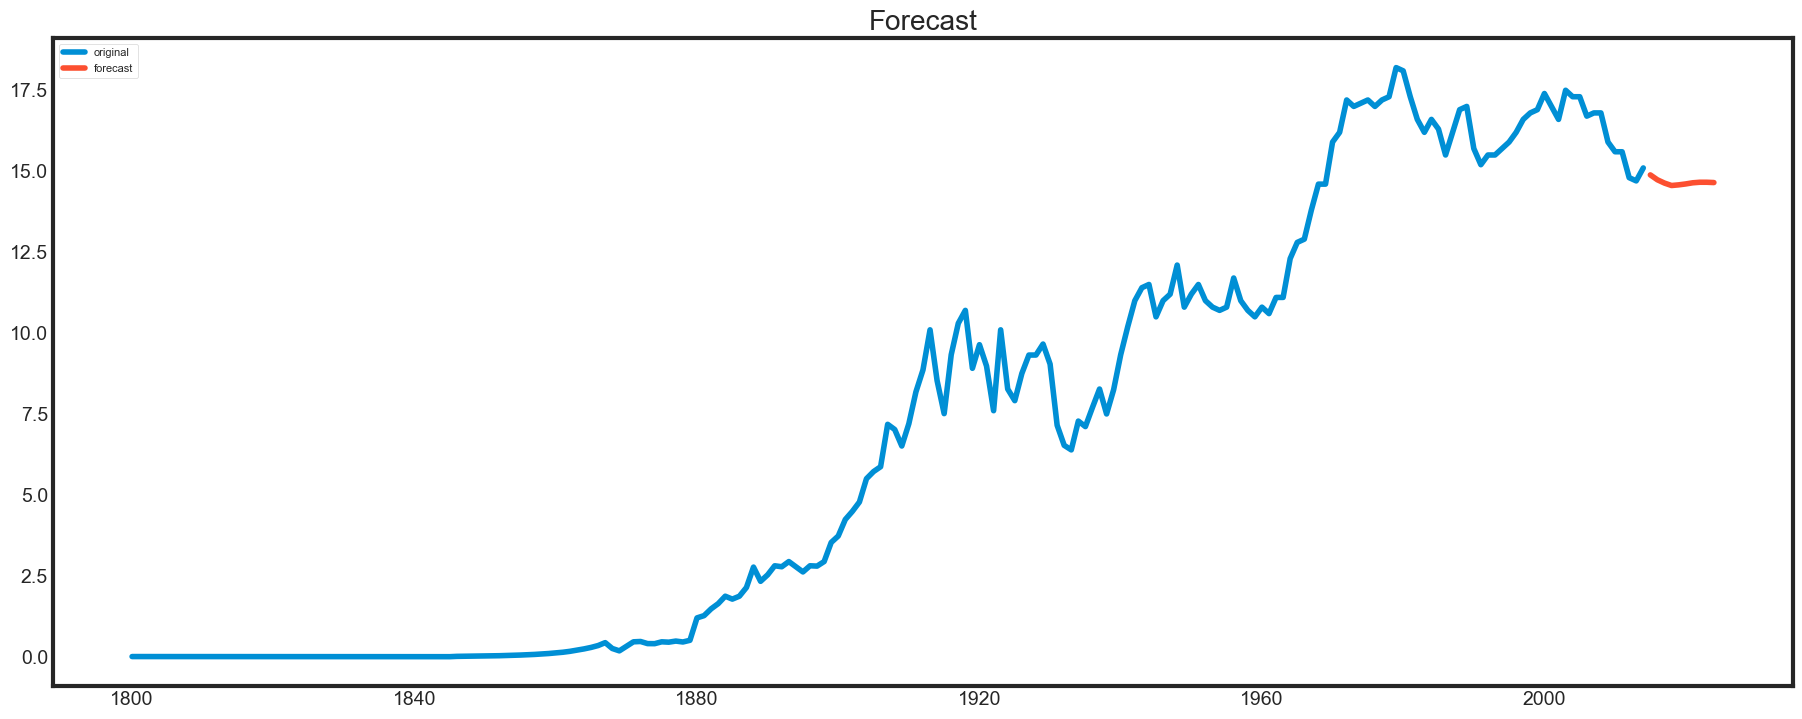

In [158]:
plt.figure(figsize=(20,8), dpi=100)
plt.plot(data, label='original')
plt.plot(future_data_10['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [159]:
data.tail()

CO2
Year            
2010-01-01  15.6
2011-01-01  15.6
2012-01-01  14.8
2013-01-01  14.7
2014-01-01  15.1

In [160]:
future_data_10

CO2
2015-01-01  14.885020
2016-01-01  14.733809
2017-01-01  14.632410
2018-01-01  14.557266
2019-01-01  14.577327
2020-01-01  14.605493
2021-01-01  14.641028
2022-01-01  14.658033
2023-01-01  14.657735
2024-01-01  14.648512

In [161]:
# Exporting to csv file for 10 years
future_data_10.to_csv(r'forecast_data_10years.csv',index=True)

## *Forecasting for next 100 years using Final ARIMA model*

In [162]:
future_dates_100=[data.index[-1]+ DateOffset(years=x)for x in range(0,101)]
future_data_100=pd.DataFrame(index=future_dates_100[1:],columns=data.columns)
len(future_data_100)

100

Text(0.5, 1.0, 'Forecast for next 100 years')

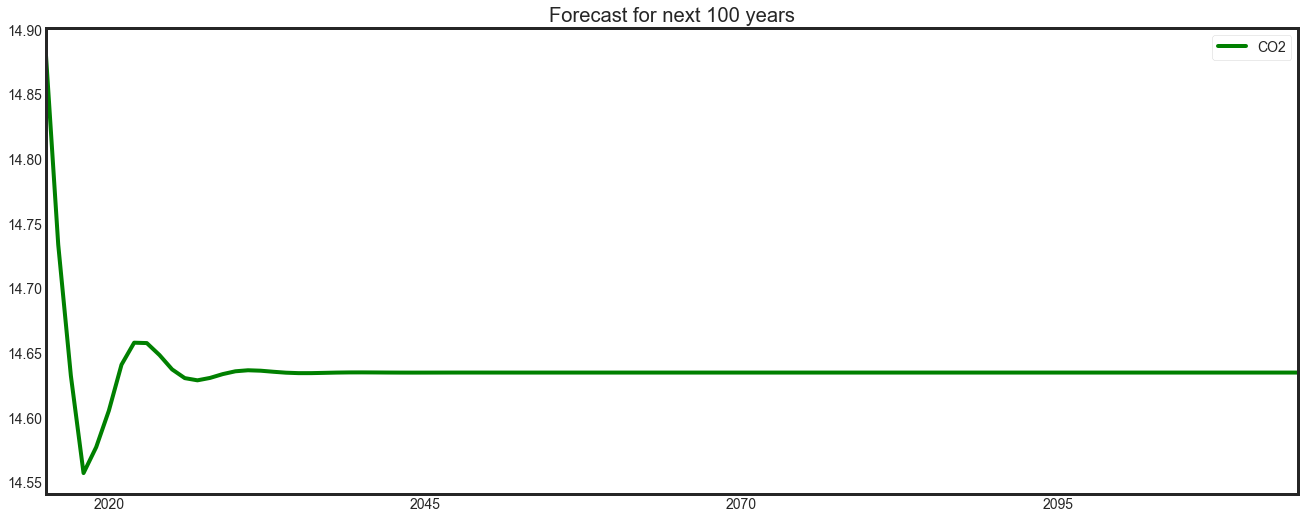

In [163]:
future_data_100['CO2'] = final_arima.predict(start = 215, end = 315, dynamic= True)  
future_data_100[['CO2']].plot(figsize=(20, 8),color = 'green')
plt.title('Forecast for next 100 years')

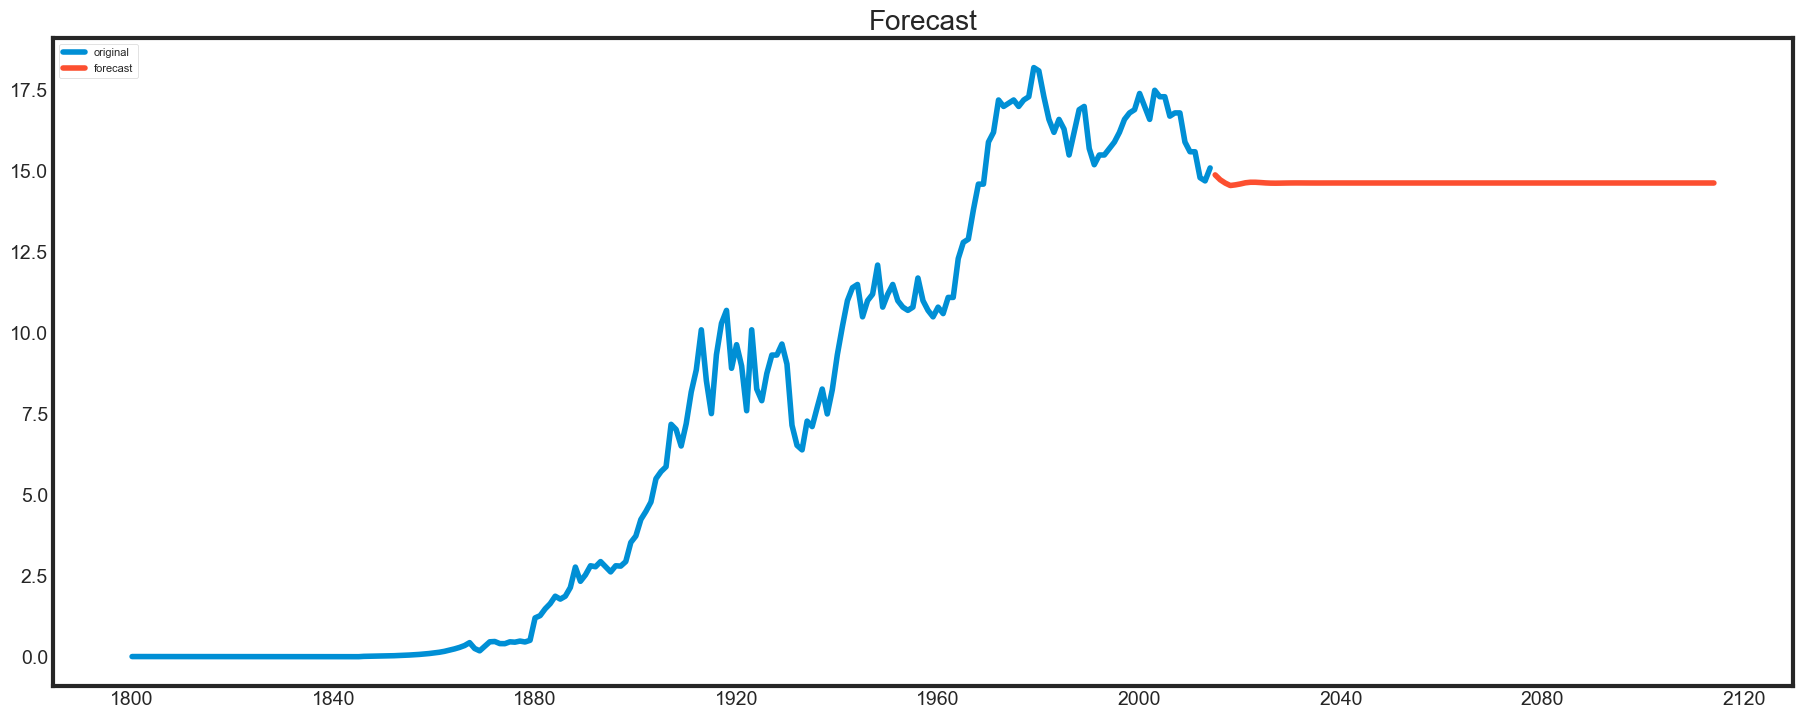

In [164]:
plt.figure(figsize=(20,8), dpi=100)
plt.plot(data, label='original')
plt.plot(future_data_100['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [165]:
future_data_100

CO2
2015-01-01  14.885020
2016-01-01  14.733809
2017-01-01  14.632410
2018-01-01  14.557266
2019-01-01  14.577327
...               ...
2110-01-01  14.634946
2111-01-01  14.634946
2112-01-01  14.634946
2113-01-01  14.634946
2114-01-01  14.634946

[100 rows x 1 columns]